In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = pd.read_excel("Formulário - Alunos (Responses).xlsx")

In [2]:
removed_columns = file.drop(columns=["Timestamp","Nome:"])
removed_columns

,Idade:,Curso:,Quais redes sociais mais usa? (pode marcar mais de uma opção),Quantos colaboradores operacionais do IDP você conhece pelo nome?,"Já interagiu com algum deles? Se não, por quê?","Se sim, que memórias ou recordações você tem com esses colaboradores?",Como você avalia o trabalho dos colaboradores de 1 a 5?,Qual campo de trabalho você tem mais proximidade ou admira o trabalho dos colaboradores? (pode marcar mais de uma opção)
0,20,Administração,TikTok,De 1 a 3,Ja,Nenhuma,5,Segurança
1,20,Ciência da Computação,Instagram,Nenhum,Sim,-,5,Limpeza
2,18,Ciência da Computação,"Twitter / X, Instagram, TikTok, Discord, YouTube",Nenhum,Não,.,5,Limpeza
3,22,Ciência da Computação,"Twitter / X, Instagram, TikTok, YouTube",Nenhum,Sim,.,5,Segurança
4,20,Economia,Twitter / X,De 1 a 3,"Sim, todas as tias da limpeza são legais",.,5,Limpeza
...,...,...,...,...,...,...,...,...
133,31,Arquitetura,"Instagram, Discord, YouTube",De 1 a 3,Sim,"Equipe excelente, atenciosa, sempre solicitos,...",5,"Portaria, Segurança"
134,23,Arquitetura,Instagram,De 1 a 3,Sim,"Sempre são muito receptivos e atenciosos, amo ...",5,"Limpeza, Portaria, Segurança, Facilities"
135,24,Economia,YouTube,De 1 a 3,Sim,Todos simpáticos,5,Portaria
136,24,Ciência da Computação,"Instagram, TikTok, Discord, YouTube",De 1 a 3,Sim,Uma vez durante o Hackaton da primeira edição,5,Facilities


In [3]:
renamed_columns = removed_columns.rename(columns={"Idade:":"idade","Curso:":"curso",
                                                  "Quais redes sociais mais usa? (pode marcar mais de uma opção)":"redes_sociais",
                                                  "Quantos colaboradores operacionais do IDP você conhece pelo nome?":"n_colaboradores",
                                                  "Já interagiu com algum deles? Se não, por quê?":"interações",
                                                  "Se sim, que memórias ou recordações você tem com esses colaboradores?":"memórias",
                                                  "Como você avalia o trabalho dos colaboradores de 1 a 5?":"avaliação",
                                                  "Qual campo de trabalho você tem mais proximidade ou admira o trabalho dos colaboradores? (pode marcar mais de uma opção)":"campos"})

In [4]:
renamed_columns["redes_sociais"] = [i.replace(" ","") for i in renamed_columns["redes_sociais"]]

In [5]:
data = renamed_columns

data["redes_sociais"] = [i.split(",") for i in data["redes_sociais"]]

In [6]:
import numpy as np

def socials(df):
    lista_redes = ["Twitter/X","Facebook","Instagram","TikTok","Discord",
                   "YouTube"]
    social = []
    for i in lista_redes:
        for e in df["redes_sociais"]:
            if i in e:
                social.append(i)
            else:
                social.append(np.NaN)
    new_df = pd.DataFrame({"redes_sociais":social})
    counts = new_df.value_counts()
    names = []
    numbers = []
    for i in range(0,len(counts)):
        names.append(counts.index[i][0])
        numbers.append(counts.values[i])
    final_df = pd.DataFrame({"rede":names,
                             "usuários":numbers})
    return final_df

In [7]:
new = socials(data)
new

,rede,usuários
0,Instagram,125
1,TikTok,65
2,YouTube,63
3,Twitter/X,37
4,Discord,24
5,Facebook,2


In [8]:
new["%"] = [i/(len(data))*100 for i in new["usuários"]]
new

,rede,usuários,%
0,Instagram,125,90.579710
1,TikTok,65,47.101449
2,YouTube,63,45.652174
3,Twitter/X,37,26.811594
4,Discord,24,17.391304
5,Facebook,2,1.449275


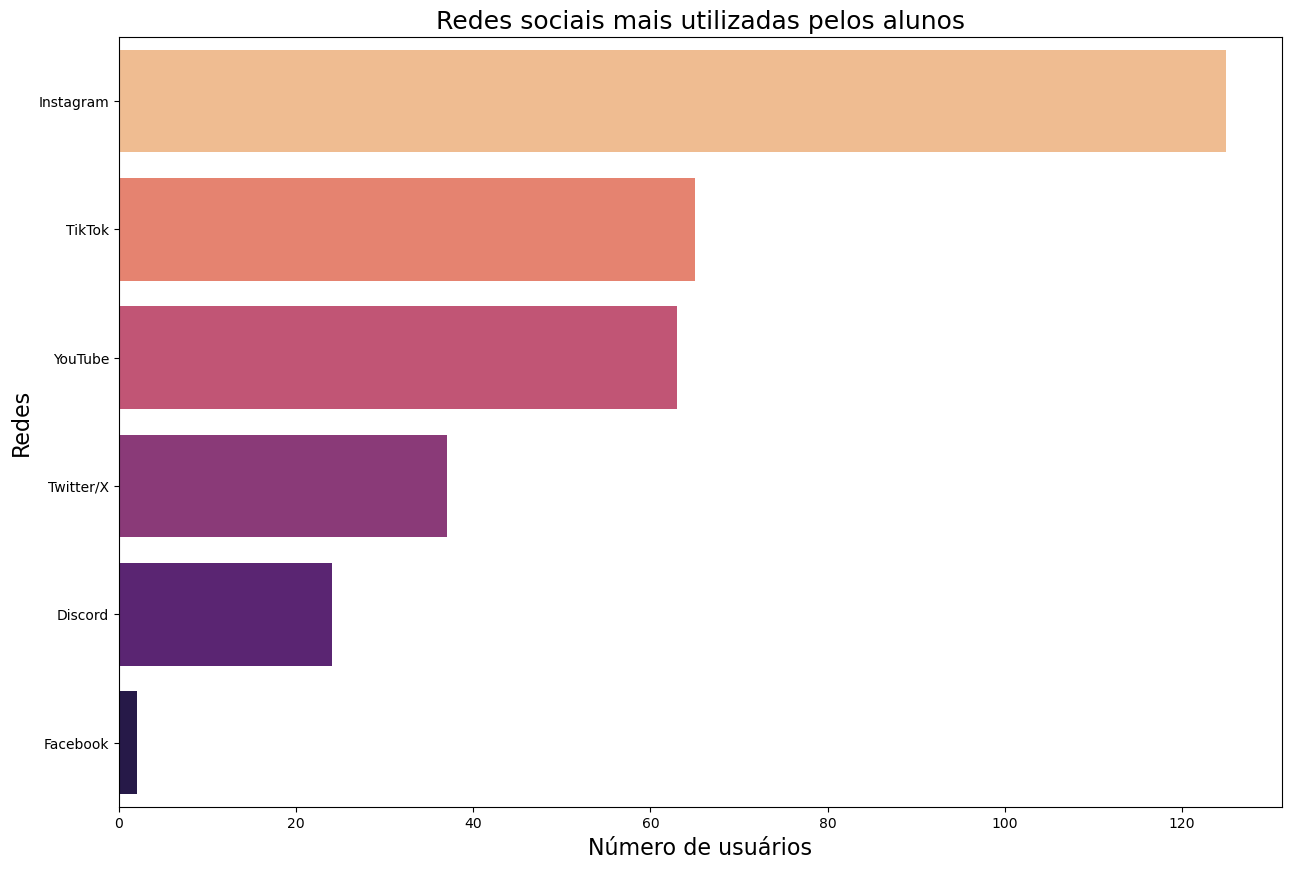

In [9]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(data=new,x="usuários",y="rede",palette="magma_r")
ax1.axes.set_title("Redes sociais mais utilizadas pelos alunos",
                   fontsize=18)
ax1.axes.set_xlabel("Número de usuários",fontsize=16)
ax1.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [10]:
colors = sns.color_palette("magma_r", n_colors=7)

curso_count = data["curso"].value_counts()
curso_count

Economia                    41
Ciência da Computação       23
Engenharia de Software      18
Publicidade e Propaganda    18
Arquitetura                 18
Administração               17
Jornalismo                   3
Name: curso, dtype: int64

([<matplotlib.patches.Wedge at 0x132e2cd8160>,
 [Text(0.6546405482876733, 0.8839942039049888, 'Economia'),
  Text(-0.80391951944538, 0.7508085017197859, 'Ciência da Computação'),
  Text(-1.0818078804478077, -0.19922778370754812, 'Engenharia de Software'),
  Text(-0.592788547285398, -0.9266076506306582, 'Publicidade e Propaganda'),
  Text(0.2725885009662048, -1.0656901562560281, 'Arquitetura'),
  Text(0.9526279098330696, -0.5500000594609761, 'Administração'),
  Text(1.0974356416214441, -0.0750667203155267, 'Jornalismo')],
 [Text(0.3570766627023672, 0.48217865667544835, '29.71%'),
  Text(-0.4385015560611163, 0.40953191002897404, '16.67%'),
  Text(-0.5900770256988042, -0.10866970020411715, '13.04%'),
  Text(-0.323339207610217, -0.5054223548894499, '13.04%'),
  Text(0.14868463689065714, -0.5812855397760153, '13.04%'),
  Text(0.5196152235453106, -0.3000000324332597, '12.32%'),
  Text(0.5986012590662422, -0.04094548380846911, '2.17%')])

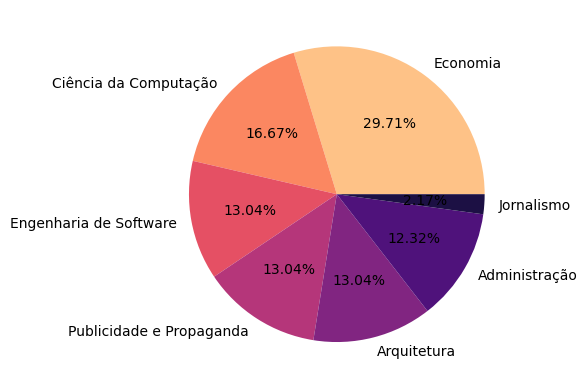

In [11]:
plt.pie(curso_count, labels=curso_count.index, colors=colors, autopct="%1.2f%%")

In [12]:
colab_count = data["n_colaboradores"].value_counts()
colab_count

De 1 a 3     70
Nenhum       25
5 ou mais    23
De 3 a 5     20
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e2d43d60>,
 [Text(-0.025039511672861187, 1.0997149734613896, 'De 1 a 3'),
  Text(-0.8986668861848764, -0.6343483488390103, 'Nenhum'),
  Text(0.14978332953220355, -1.0897545385059186, '5 ou mais'),
  Text(0.9879404831198962, -0.4837081783604928, 'De 3 a 5')],
 [Text(-0.013657915457924283, 0.5998445309789397, '50.72%'),
  Text(-0.4901819379190235, -0.34600819027582375, '18.12%'),
  Text(0.08169999792665648, -0.5944115664577737, '16.67%'),
  Text(0.538876627156307, -0.26384082456026875, '14.49%')])

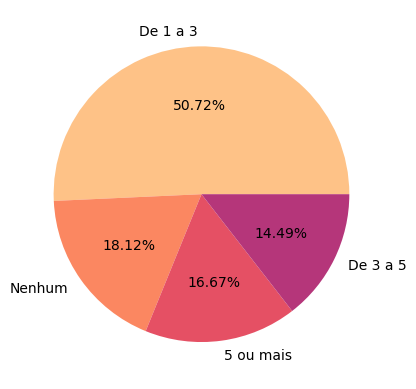

In [13]:
plt.pie(colab_count, labels=colab_count.index, colors=colors, autopct="%1.2f%%")

In [14]:
data.describe()

,idade,avaliação
count,138.000000,138.000000
mean,20.630435,4.862319
std,2.549012,0.455173
min,17.000000,2.000000
25%,19.000000,5.000000
50%,20.000000,5.000000
75%,22.000000,5.000000
max,33.000000,5.000000


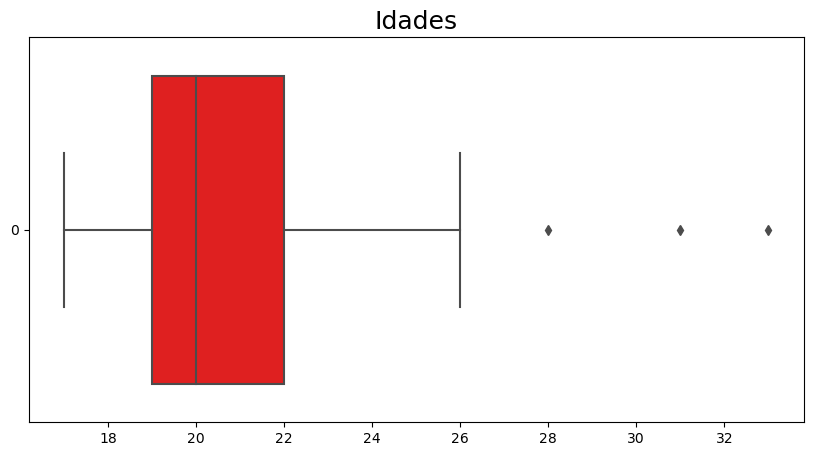

In [15]:
plt.figure(figsize=(10,5))
ax2 = sns.boxplot(data=data["idade"],orient="h",color="red")
ax2.axes.set_title("Idades",fontsize=18)
plt.show()

In [16]:
data.tail(10)

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
128,25,Economia,[Instagram],De 1 a 3,"Sim, diariamente","Somente dando bom dia, diariamente",5,Limpeza
129,19,Economia,[Instagram],De 1 a 3,Sim!,Super simpático.,5,Segurança
130,19,Economia,"[Instagram, TikTok]",De 1 a 3,Sim,Tenho memórias da moça que faz o café conversa...,5,Limpeza
131,19,Economia,"[Instagram, TikTok]",De 3 a 5,Sim,"Tia Laurita, maravilhosa",4,Limpeza
132,19,Arquitetura,"[Instagram, TikTok]",De 3 a 5,Já,Elas foram super fofas e prestativas,5,Limpeza
133,31,Arquitetura,"[Instagram, Discord, YouTube]",De 1 a 3,Sim,"Equipe excelente, atenciosa, sempre solicitos,...",5,"Portaria, Segurança"
134,23,Arquitetura,[Instagram],De 1 a 3,Sim,"Sempre são muito receptivos e atenciosos, amo ...",5,"Limpeza, Portaria, Segurança, Facilities"
135,24,Economia,[YouTube],De 1 a 3,Sim,Todos simpáticos,5,Portaria
136,24,Ciência da Computação,"[Instagram, TikTok, Discord, YouTube]",De 1 a 3,Sim,Uma vez durante o Hackaton da primeira edição,5,Facilities
137,20,Arquitetura,"[Instagram, TikTok]",De 1 a 3,Sim,Todo dia vejo a tia do café,5,"Limpeza, Segurança, Lanchonete"


In [17]:
data["campos"][30:40]

30                                     Limpeza
31                                     Limpeza
32    Limpeza, Portaria, Segurança, Facilities
33                                    Portaria
34                                     Limpeza
35                                     Limpeza
36                                     Limpeza
37                                     Limpeza
38                                  Facilities
39              Limpeza, Segurança, Lanchonete
Name: campos, dtype: object

In [18]:
removed_spaces = []
for i in list(data["campos"]):
    if type(i) != str:
        removed_spaces.append(np.NaN)
    else:
        strip = i.replace(" ","")
        removed_spaces.append(strip)

data["campos"] = removed_spaces

In [19]:
data.iloc[68:90,7]

68                          Limpeza,Portaria,Segurança
69                                             Limpeza
70                                          Facilities
71                                          Facilities
72                                            Portaria
73                                             Limpeza
74                                          Facilities
75                                            Portaria
76                                           Segurança
77                                             Limpeza
78                                                 NaN
79                                             Limpeza
80                          Limpeza,Portaria,Segurança
81                                            Portaria
82                                            Portaria
83                                          Facilities
84                         Limpeza,Portaria,Facilities
85                                                 NaN
86        

In [20]:
new_column = []
for i in list(data["campos"]):
    if type(i) != str:
        new_column.append([np.NaN])
    else:
        list_object = i.split(",")
        new_column.append(list_object)

data["campos"] = new_column

In [21]:
data.iloc[68:90,7]

68                       [Limpeza, Portaria, Segurança]
69                                            [Limpeza]
70                                         [Facilities]
71                                         [Facilities]
72                                           [Portaria]
73                                            [Limpeza]
74                                         [Facilities]
75                                           [Portaria]
76                                          [Segurança]
77                                            [Limpeza]
78                                                [nan]
79                                            [Limpeza]
80                       [Limpeza, Portaria, Segurança]
81                                           [Portaria]
82                                           [Portaria]
83                                         [Facilities]
84                      [Limpeza, Portaria, Facilities]
85                                              

In [22]:
def campos_admirados(df):
    lista_campos = ["Limpeza","Portaria","Segurança","Facilities","Marketing",
                    "Lanchonete"]
    campo = []
    for i in lista_campos:
        for e in df["campos"]:
            if i in e:
                campo.append(i)
            else:
                campo.append(np.NaN)
    new_df = pd.DataFrame({"campos":campo})
    counts = new_df.value_counts()
    names = []
    numbers = []
    for i in range(0,len(counts)):
        names.append(counts.index[i][0])
        numbers.append(counts.values[i])
    final_df = pd.DataFrame({"campo":names,
                             "qtde":numbers})
    return final_df

In [23]:
campos = campos_admirados(data)
campos

,campo,qtde
0,Limpeza,74
1,Portaria,43
2,Segurança,33
3,Facilities,23
4,Lanchonete,10
5,Marketing,9


In [24]:
campos["%"] = [i/(len(data))*100 for i in campos["qtde"]]
campos

,campo,qtde,%
0,Limpeza,74,53.623188
1,Portaria,43,31.159420
2,Segurança,33,23.913043
3,Facilities,23,16.666667
4,Lanchonete,10,7.246377
5,Marketing,9,6.521739


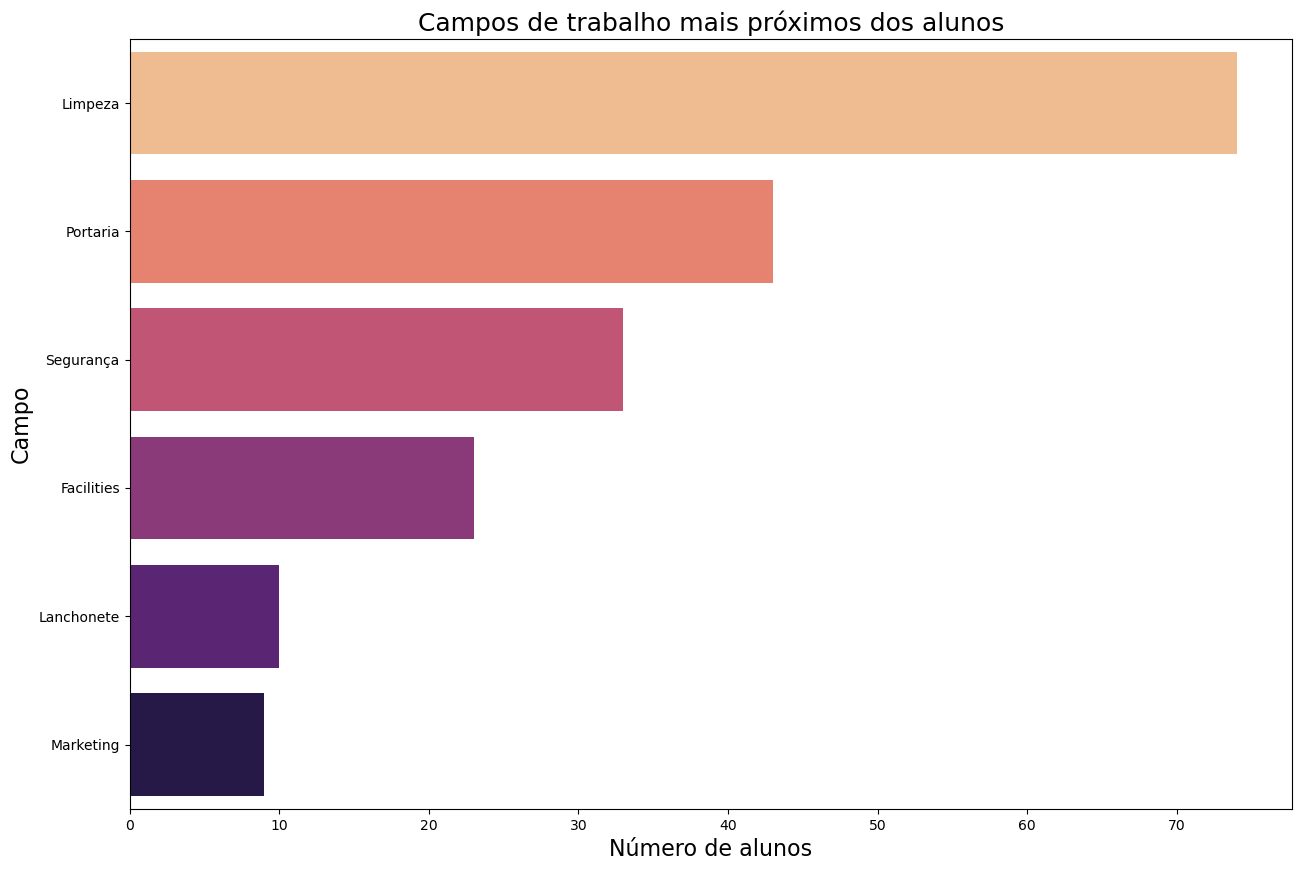

In [25]:
plt.figure(figsize=(15,10))
ax3 = sns.barplot(data=campos,x="qtde",y="campo",palette="magma_r")
ax3.axes.set_title("Campos de trabalho mais próximos dos alunos",
                   fontsize=18)
ax3.axes.set_xlabel("Número de alunos",fontsize=16)
ax3.axes.set_ylabel("Campo",fontsize=16)
plt.show()

## Preparando os dados para análise de afinidade

### Colunas dos cursos

In [26]:
arq_bool = []
eco_bool = []
pp_bool = []
cc_bool = []
es_bool = []
adm_bool = []
jor_bool = []

for i in data["curso"]:
    if i == "Arquitetura":
        arq_bool.append(True)
        eco_bool.append(False)
        pp_bool.append(False)
        cc_bool.append(False)
        es_bool.append(False)
        adm_bool.append(False)
        jor_bool.append(False)
    elif i == "Economia":
        arq_bool.append(False)
        eco_bool.append(True)
        pp_bool.append(False)
        cc_bool.append(False)
        es_bool.append(False)
        adm_bool.append(False)
        jor_bool.append(False)
    elif i == "Publicidade e Propaganda":
        arq_bool.append(False)
        eco_bool.append(False)
        pp_bool.append(True)
        cc_bool.append(False)
        es_bool.append(False)
        adm_bool.append(False)
        jor_bool.append(False)
    elif i == "Ciência da Computação":
        arq_bool.append(False)
        eco_bool.append(False)
        pp_bool.append(False)
        cc_bool.append(True)
        es_bool.append(False)
        adm_bool.append(False)
        jor_bool.append(False)
    elif i == "Engenharia de Software":
        arq_bool.append(False)
        eco_bool.append(False)
        pp_bool.append(False)
        cc_bool.append(False)
        es_bool.append(True)
        adm_bool.append(False)
        jor_bool.append(False)
    elif i == "Administração":
        arq_bool.append(False)
        eco_bool.append(False)
        pp_bool.append(False)
        cc_bool.append(False)
        es_bool.append(False)
        adm_bool.append(True)
        jor_bool.append(False)
    elif i == "Jornalismo":
        arq_bool.append(False)
        eco_bool.append(False)
        pp_bool.append(False)
        cc_bool.append(False)
        es_bool.append(False)
        adm_bool.append(False)
        jor_bool.append(True)

data_bool = pd.DataFrame({"Arquitetura":arq_bool,"Economia":eco_bool,
                          "Publicidade e Propaganda":pp_bool,
                          "Ciência da Computação":cc_bool,
                          "Engenharia de Software":es_bool,
                          "Administração":adm_bool,
                          "Jornalismo":jor_bool})
data_bool

,Arquitetura,Economia,Publicidade e Propaganda,Ciência da Computação,Engenharia de Software,Administração,Jornalismo
0,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
133,True,False,False,False,False,False,False
134,True,False,False,False,False,False,False
135,False,True,False,False,False,False,False
136,False,False,False,True,False,False,False


### Colunas das redes sociais

In [27]:
twitter_bool = []
fb_bool = []
ig_bool = []
tiktok_bool = []
discord_bool = []
yt_bool = []

for i in data["redes_sociais"]:
    if "Twitter/X" in i:
        twitter_bool.append(True)
    else:
        twitter_bool.append(False)
data_bool["Twitter/X"] = twitter_bool

for i in data["redes_sociais"]:
    if "Facebook" in i:
        fb_bool.append(True)
    else:
        fb_bool.append(False)
data_bool["Facebook"] = fb_bool

for i in data["redes_sociais"]:
    if "Instagram" in i:
        ig_bool.append(True)
    else:
        ig_bool.append(False)
data_bool["Instagram"] = ig_bool

for i in data["redes_sociais"]:
    if "TikTok" in i:
        tiktok_bool.append(True)
    else:
        tiktok_bool.append(False)
data_bool["TikTok"] = tiktok_bool

for i in data["redes_sociais"]:
    if "Discord" in i:
        discord_bool.append(True)
    else:
        discord_bool.append(False)
data_bool["Discord"] = discord_bool

for i in data["redes_sociais"]:
    if "YouTube" in i:
        yt_bool.append(True)
    else:
        yt_bool.append(False)
data_bool["YouTube"] = yt_bool

data_bool

,Arquitetura,Economia,Publicidade e Propaganda,Ciência da Computação,Engenharia de Software,Administração,Jornalismo,Twitter/X,Facebook,Instagram,TikTok,Discord,YouTube
0,False,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,True,False,True,True,True,True
3,False,False,False,True,False,False,False,True,False,True,True,False,True
4,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,True,False,False,False,False,False,False,False,False,True,False,True,True
134,True,False,False,False,False,False,False,False,False,True,False,False,False
135,False,True,False,False,False,False,False,False,False,False,False,False,True
136,False,False,False,True,False,False,False,False,False,True,True,True,True


### Colunas dos campos

In [28]:
lista_campos = ["Limpeza","Portaria","Segurança","Facilities","Marketing",
                "Lanchonete"]

limpeza_bool = []
portaria_bool = []
security_bool = []
facilities_bool = []
mkt_bool = []
lanchonete_bool = []

for i in data["campos"]:
    if "Limpeza" in i:
        limpeza_bool.append(True)
    else:
        limpeza_bool.append(False)
data_bool["Limpeza"] = limpeza_bool

for i in data["campos"]:
    if "Portaria" in i:
        portaria_bool.append(True)
    else:
        portaria_bool.append(False)
data_bool["Portaria"] = portaria_bool

for i in data["campos"]:
    if "Segurança" in i:
        security_bool.append(True)
    else:
        security_bool.append(False)
data_bool["Segurança"] = security_bool

for i in data["campos"]:
    if "Facilities" in i:
        facilities_bool.append(True)
    else:
        facilities_bool.append(False)
data_bool["Facilities"] = facilities_bool

for i in data["campos"]:
    if "Marketing" in i:
        mkt_bool.append(True)
    else:
        mkt_bool.append(False)
data_bool["Marketing"] = mkt_bool

for i in data["campos"]:
    if "Lanchonete" in i:
        lanchonete_bool.append(True)
    else:
        lanchonete_bool.append(False)
data_bool["Lanchonete"] = lanchonete_bool

data_bool

,Arquitetura,Economia,Publicidade e Propaganda,Ciência da Computação,Engenharia de Software,Administração,Jornalismo,Twitter/X,Facebook,Instagram,TikTok,Discord,YouTube,Limpeza,Portaria,Segurança,Facilities,Marketing,Lanchonete
0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,True,True,False,True,False,False,True,False,False,False
4,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,True,False,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,False,False
134,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False
135,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
136,False,False,False,True,False,False,False,False,False,True,True,True,True,False,False,False,True,False,False


In [29]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(data_bool, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,0.297101,(Economia)
1,0.268116,(Twitter/X)
2,0.905797,(Instagram)
3,0.471014,(TikTok)
4,0.456522,(YouTube)
5,0.536232,(Limpeza)
6,0.311594,(Portaria)
7,0.239130,(Segurança)
8,0.260870,"(Economia, Instagram)"
9,0.246377,"(Twitter/X, Instagram)"


In [30]:
associations = association_rules(freq_items, metric="confidence",
                                 min_threshold=0.3)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Economia),(Instagram),0.297101,0.905797,0.260870,0.878049,0.969366,-0.008244,0.772464,-0.043025
1,(Twitter/X),(Instagram),0.268116,0.905797,0.246377,0.918919,1.014486,0.003518,1.161836,0.019511
2,(Instagram),(TikTok),0.905797,0.471014,0.449275,0.496000,1.053046,0.022632,1.049574,0.534739
3,(TikTok),(Instagram),0.471014,0.905797,0.449275,0.953846,1.053046,0.022632,2.041063,0.095228
4,(YouTube),(Instagram),0.456522,0.905797,0.405797,0.888889,0.981333,-0.007719,0.847826,-0.033816
5,(Instagram),(YouTube),0.905797,0.456522,0.405797,0.448000,0.981333,-0.007719,0.984562,-0.168000
6,(Instagram),(Limpeza),0.905797,0.536232,0.492754,0.544000,1.014486,0.007036,1.017035,0.151584
7,(Limpeza),(Instagram),0.536232,0.905797,0.492754,0.918919,1.014486,0.007036,1.161836,0.030790
8,(Portaria),(Instagram),0.311594,0.905797,0.275362,0.883721,0.975628,-0.006879,0.810145,-0.035017
9,(Instagram),(Portaria),0.905797,0.311594,0.275362,0.304000,0.975628,-0.006879,0.989089,-0.209600


In [31]:
associations = associations.sort_values(by="confidence", ignore_index=True,
                                        ascending=False)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(TikTok, Limpeza)",(Instagram),0.253623,0.905797,0.246377,0.971429,1.072457,0.016646,3.297101,0.090520
1,(TikTok),(Instagram),0.471014,0.905797,0.449275,0.953846,1.053046,0.022632,2.041063,0.095228
2,(Limpeza),(Instagram),0.536232,0.905797,0.492754,0.918919,1.014486,0.007036,1.161836,0.030790
3,(Twitter/X),(Instagram),0.268116,0.905797,0.246377,0.918919,1.014486,0.003518,1.161836,0.019511
4,(Segurança),(Instagram),0.239130,0.905797,0.217391,0.909091,1.003636,0.000788,1.036232,0.004762
5,(YouTube),(Instagram),0.456522,0.905797,0.405797,0.888889,0.981333,-0.007719,0.847826,-0.033816
6,(Portaria),(Instagram),0.311594,0.905797,0.275362,0.883721,0.975628,-0.006879,0.810145,-0.035017
7,(Economia),(Instagram),0.297101,0.905797,0.260870,0.878049,0.969366,-0.008244,0.772464,-0.043025
8,(Portaria),(YouTube),0.311594,0.456522,0.202899,0.651163,1.426357,0.060649,1.557971,0.434211
9,"(Instagram, TikTok)",(Limpeza),0.449275,0.536232,0.246377,0.548387,1.022668,0.005461,1.026915,0.040248


In [32]:
associations = associations.drop(columns=["lift","leverage","conviction",
                                          "zhangs_metric"], axis=1)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,"(TikTok, Limpeza)",(Instagram),0.253623,0.905797,0.246377,0.971429
1,(TikTok),(Instagram),0.471014,0.905797,0.449275,0.953846
2,(Limpeza),(Instagram),0.536232,0.905797,0.492754,0.918919
3,(Twitter/X),(Instagram),0.268116,0.905797,0.246377,0.918919
4,(Segurança),(Instagram),0.239130,0.905797,0.217391,0.909091
5,(YouTube),(Instagram),0.456522,0.905797,0.405797,0.888889
6,(Portaria),(Instagram),0.311594,0.905797,0.275362,0.883721
7,(Economia),(Instagram),0.297101,0.905797,0.260870,0.878049
8,(Portaria),(YouTube),0.311594,0.456522,0.202899,0.651163
9,"(Instagram, TikTok)",(Limpeza),0.449275,0.536232,0.246377,0.548387


## Análise por cursos

### Arquitetura

In [33]:
arq = data[data["curso"] == "Arquitetura"]

arq = arq.reset_index()
arq = arq.drop(columns=["index"])
arq

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,22,Arquitetura,"[Instagram, TikTok, LinkedIn]",De 1 a 3,Sim,Não tenho nenhuma específica,4,"[Limpeza, Portaria, Facilities]"
1,20,Arquitetura,[Instagram],De 3 a 5,Sim.,"Boas conversas que ocorrem diariamente e, muit...",5,"[Limpeza, Segurança, Facilities]"
2,23,Arquitetura,[Instagram],De 1 a 3,Sim,Conversas sobre assuntos aleatórios nos corred...,5,"[Limpeza, Segurança]"
3,21,Arquitetura,"[Instagram, TikTok]",Nenhum,Não,Não,2,[Limpeza]
4,20,Arquitetura,"[Instagram, TikTok]",5 ou mais,"Sim, são uns queridos",Idp Go e etc..,5,"[Limpeza, Marketing]"
5,19,Arquitetura,"[Twitter/X, Instagram, TikTok]",De 3 a 5,sim,conversas sobre o dia a dia,5,"[Limpeza, Portaria, Segurança, Facilities, Mar..."
6,19,Arquitetura,[Instagram],5 ou mais,sim,viagens no IDP go e outros,5,"[Limpeza, Marketing]"
7,20,Arquitetura,"[Instagram, TikTok]",De 1 a 3,Sim,Interagir mais com os alunos,5,[Limpeza]
8,18,Arquitetura,[Instagram],Nenhum,Não,Nenhuma,5,[Limpeza]
9,20,Arquitetura,"[Twitter/X, Instagram]",De 3 a 5,"Sim, porque eles que ajudam a instituição func...",Todas as manhãs conversa com café,5,"[Limpeza, Portaria, Facilities]"


In [34]:
arq_redes = socials(arq)
arq_redes

,rede,usuários
0,Instagram,18
1,TikTok,11
2,Discord,2
3,Twitter/X,2
4,YouTube,1


In [35]:
arq_redes["%"] = [i/(len(arq))*100 for i in arq_redes["usuários"]]
arq_redes

,rede,usuários,%
0,Instagram,18,100.000000
1,TikTok,11,61.111111
2,Discord,2,11.111111
3,Twitter/X,2,11.111111
4,YouTube,1,5.555556


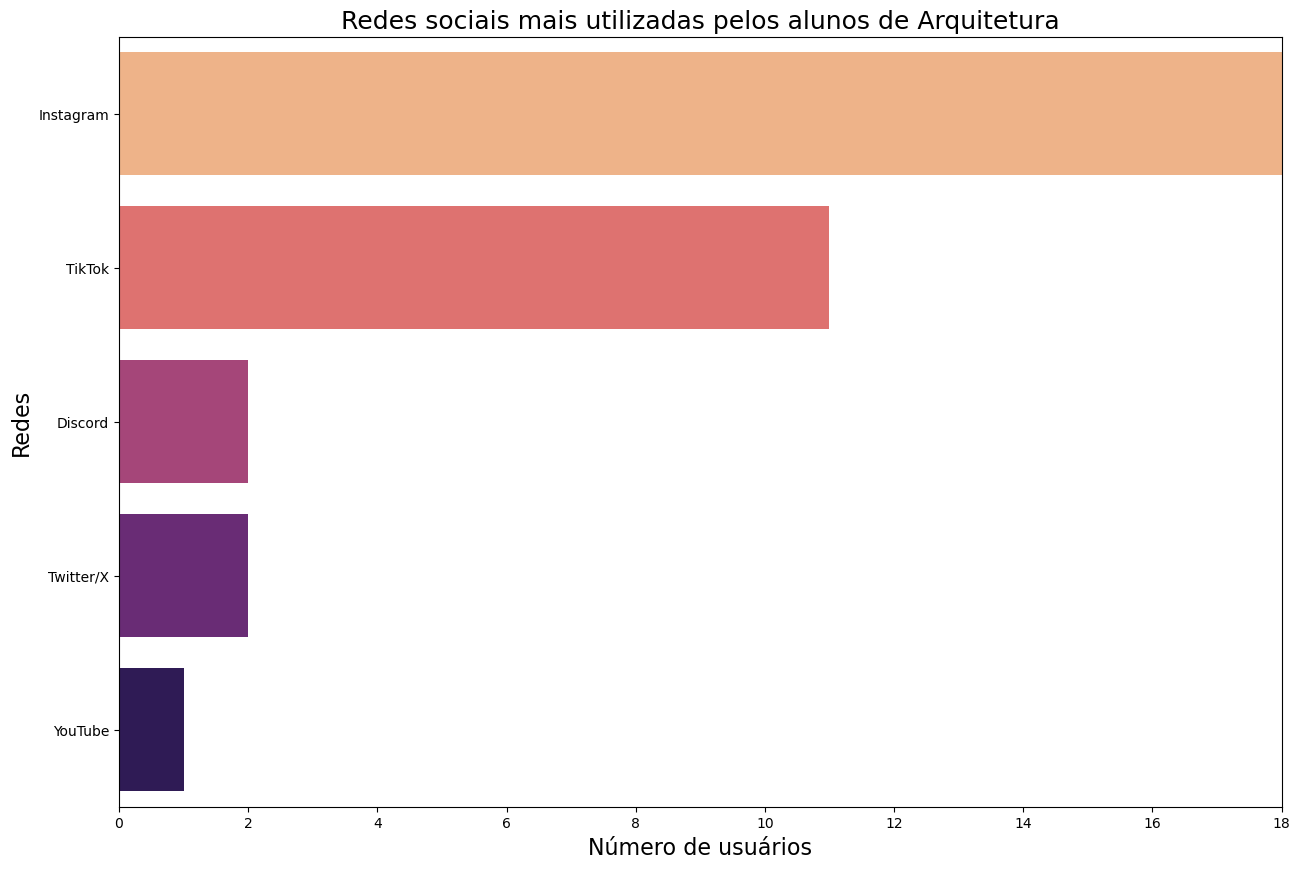

In [36]:
plt.figure(figsize=(15,10))
ax4 = sns.barplot(data=arq_redes,x="usuários",y="rede",palette="magma_r")
ax4.axes.set_title("Redes sociais mais utilizadas pelos alunos de Arquitetura",
                   fontsize=18)
ax4.axes.set_xlabel("Número de usuários",fontsize=16)
ax4.axes.set_ylabel("Redes",fontsize=16)
ax4.set_xlim(left=0,right=18)
plt.show()

In [37]:
arq_colab_count = arq["n_colaboradores"].value_counts()
arq_colab_count

De 1 a 3     6
De 3 a 5     5
5 ou mais    4
Nenhum       3
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e3a2aca0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'De 1 a 3'),
  Text(-1.0832885481844534, 0.19101288273940947, 'De 3 a 5'),
  Text(-0.19101283202701203, -1.0832885571264106, '5 ou mais'),
  Text(0.9526280385698485, -0.5499998364823061, 'Nenhum')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5908846626460654, 0.10418884513058697, '27.78%'),
  Text(-0.10418881746927927, -0.5908846675234967, '22.22%'),
  Text(0.5196152937653719, -0.29999991080853056, '16.67%')])

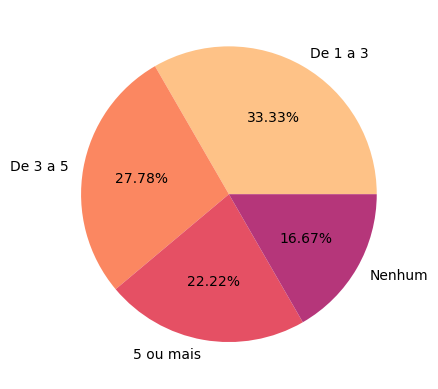

In [38]:
plt.pie(arq_colab_count, labels=arq_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [39]:
arq.describe()

,idade,avaliação
count,18.000000,18.000000
mean,20.722222,4.777778
std,2.926664,0.732084
min,18.000000,2.000000
25%,19.000000,5.000000
50%,20.000000,5.000000
75%,21.000000,5.000000
max,31.000000,5.000000


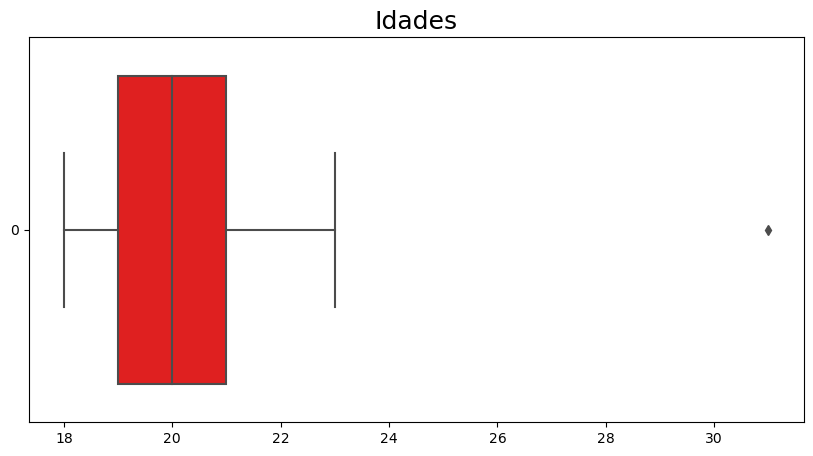

In [40]:
plt.figure(figsize=(10,5))
ax5 = sns.boxplot(data=arq["idade"],orient="h",color="red")
ax5.axes.set_title("Idades",fontsize=18)
plt.show()

In [41]:
arq_campos = campos_admirados(arq)
arq_campos = arq_campos.reset_index()
arq_campos = arq_campos.drop(columns=["index"])
arq_campos

,campo,qtde
0,Limpeza,16
1,Segurança,9
2,Facilities,8
3,Portaria,8
4,Marketing,5
5,Lanchonete,2


In [42]:
arq_campos["%"] = [i/(len(arq))*100 for i in arq_campos["qtde"]]
arq_campos

,campo,qtde,%
0,Limpeza,16,88.888889
1,Segurança,9,50.000000
2,Facilities,8,44.444444
3,Portaria,8,44.444444
4,Marketing,5,27.777778
5,Lanchonete,2,11.111111


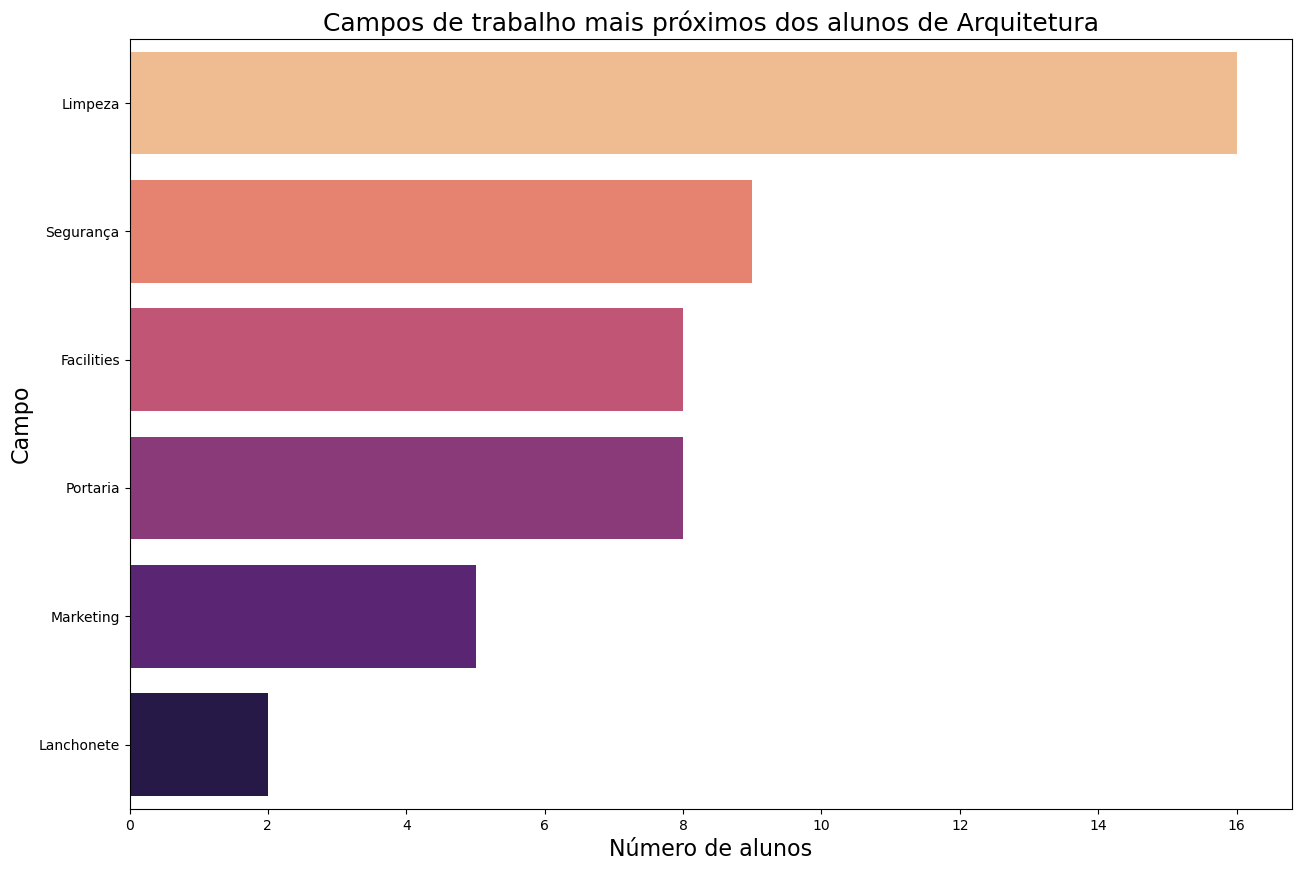

In [43]:
plt.figure(figsize=(15,10))
ax6 = sns.barplot(data=arq_campos,x="qtde",y="campo",palette="magma_r")
ax6.axes.set_title("Campos de trabalho mais próximos dos alunos de Arquitetura",
                   fontsize=18)
ax6.axes.set_xlabel("Número de alunos",fontsize=16)
ax6.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Economia

In [44]:
eco = data[data["curso"] == "Economia"]

eco = eco.reset_index()
eco = eco.drop(columns=["index"])
eco

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,20,Economia,[Twitter/X],De 1 a 3,"Sim, todas as tias da limpeza são legais",.,5,[Limpeza]
1,20,Economia,"[Instagram, TikTok]",5 ou mais,"Já, muito",A Maria da limpeza sempre me ajuda,5,[Limpeza]
2,21,Economia,[Instagram],De 1 a 3,Sim,A tia laurita que fazia o café,5,[Limpeza]
3,20,Economia,"[Twitter/X, Instagram, YouTube]",5 ou mais,Sim,Apenas bate papo,5,[Limpeza]
4,23,Economia,"[Twitter/X, Instagram]",Nenhum,Sim,"Boa, são todos simpaticos e solícito",5,[Portaria]
5,20,Economia,"[Instagram, Discord, YouTube]",De 1 a 3,Já,Cafe,5,[Limpeza]
6,19,Economia,"[Instagram, YouTube]",De 1 a 3,Sim,Café da tia Laurita,5,[Limpeza]
7,23,Economia,[Instagram],De 3 a 5,Já sim,Cafezinho,5,[Limpeza]
8,19,Economia,[Instagram],De 1 a 3,Sim,Com o pessoal da limpeza e segurança,3,[Limpeza]
9,24,Economia,"[Instagram, Discord]",De 1 a 3,Sim,Conversas aleatórias do dia a dia,5,[Limpeza]


In [45]:
eco_redes = socials(eco)
eco_redes

,rede,usuários
0,Instagram,36
1,TikTok,21
2,YouTube,17
3,Twitter/X,12
4,Discord,4


In [46]:
eco_redes["%"] = [i/(len(eco))*100 for i in eco_redes["usuários"]]
eco_redes

,rede,usuários,%
0,Instagram,36,87.804878
1,TikTok,21,51.219512
2,YouTube,17,41.463415
3,Twitter/X,12,29.268293
4,Discord,4,9.756098


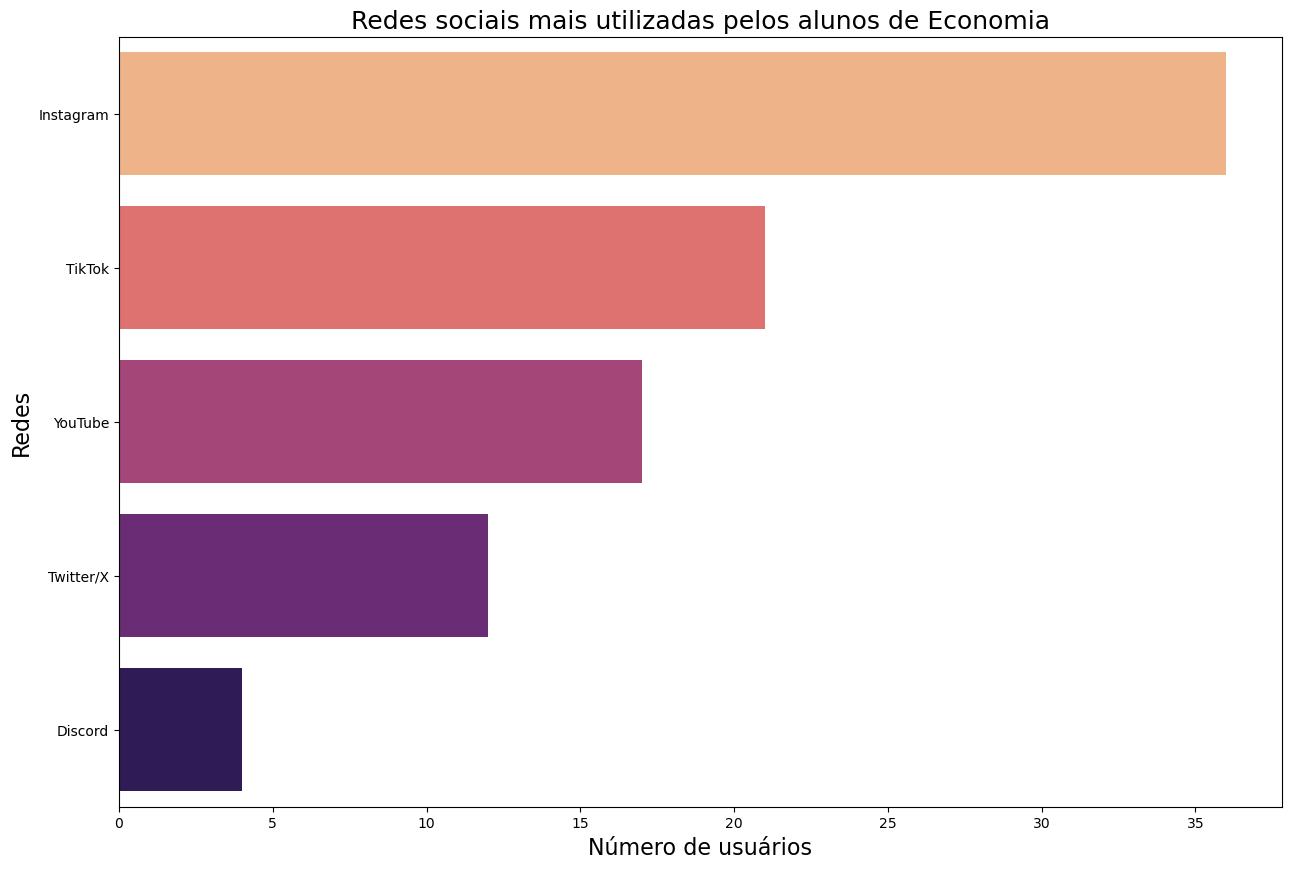

In [47]:
plt.figure(figsize=(15,10))
ax7 = sns.barplot(data=eco_redes,x="usuários",y="rede",palette="magma_r")
ax7.axes.set_title("Redes sociais mais utilizadas pelos alunos de Economia",
                   fontsize=18)
ax7.axes.set_xlabel("Número de usuários",fontsize=16)
ax7.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [48]:
eco_colab_count = eco["n_colaboradores"].value_counts()
eco_colab_count

De 1 a 3     23
Nenhum        8
De 3 a 5      6
5 ou mais     4
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e55e6ee0>,
 [Text(-0.20943022501311478, 1.0798791510400394, 'De 1 a 3'),
  Text(-0.5979243176519439, -0.9233019605526989, 'Nenhum'),
  Text(0.5254917485044461, -0.9663635042020886, 'De 3 a 5'),
  Text(1.0487360039759028, -0.3318927446701042, '5 ou mais')],
 [Text(-0.11423466818897168, 0.5890249914763851, '56.10%'),
  Text(-0.32614053690106026, -0.503619251210563, '19.51%'),
  Text(0.286631862820607, -0.5271073659284119, '14.63%'),
  Text(0.5720378203504924, -0.1810324061836932, '9.76%')])

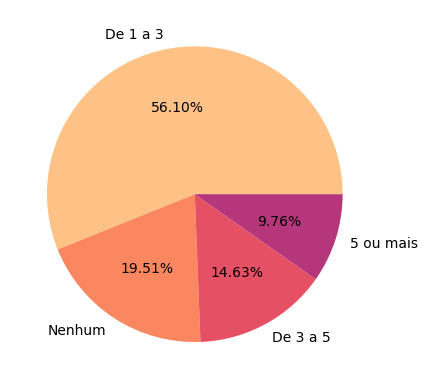

In [49]:
plt.pie(eco_colab_count, labels=eco_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [50]:
eco.describe()

,idade,avaliação
count,41.000000,41.000000
mean,20.341463,4.902439
std,2.174968,0.374492
min,18.000000,3.000000
25%,19.000000,5.000000
50%,20.000000,5.000000
75%,21.000000,5.000000
max,25.000000,5.000000


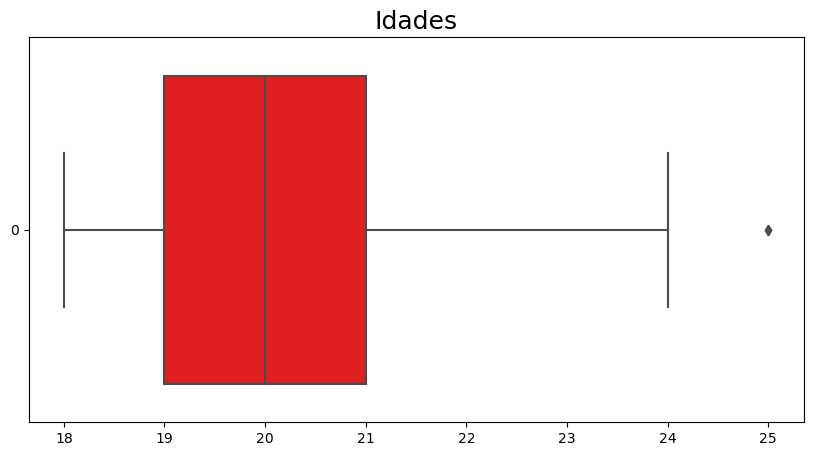

In [51]:
plt.figure(figsize=(10,5))
ax8 = sns.boxplot(data=eco["idade"],orient="h",color="red")
ax8.axes.set_title("Idades",fontsize=18)
plt.show()

In [52]:
eco_campos = campos_admirados(eco)
eco_campos = eco_campos.reset_index()
eco_campos = eco_campos.drop(columns=["index"])
eco_campos

,campo,qtde
0,Limpeza,22
1,Portaria,7
2,Segurança,4
3,Lanchonete,2
4,Facilities,1


In [53]:
eco_campos["%"] = [i/(len(eco))*100 for i in eco_campos["qtde"]]
eco_campos

,campo,qtde,%
0,Limpeza,22,53.658537
1,Portaria,7,17.073171
2,Segurança,4,9.756098
3,Lanchonete,2,4.878049
4,Facilities,1,2.439024


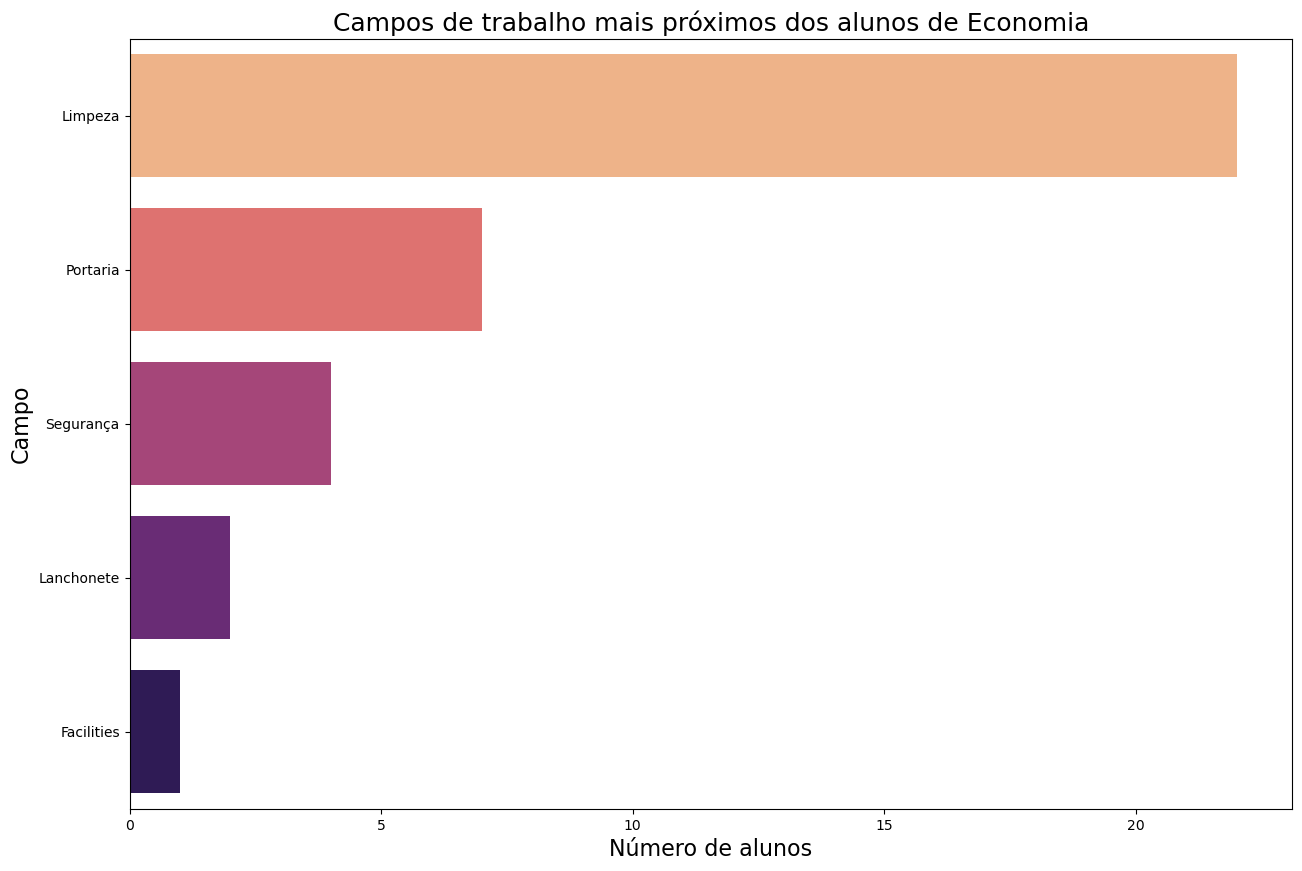

In [54]:
plt.figure(figsize=(15,10))
ax9 = sns.barplot(data=eco_campos,x="qtde",y="campo",palette="magma_r")
ax9.axes.set_title("Campos de trabalho mais próximos dos alunos de Economia",
                   fontsize=18)
ax9.axes.set_xlabel("Número de alunos",fontsize=16)
ax9.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Publicidade e Propaganda

In [55]:
pp = data[data["curso"] == "Publicidade e Propaganda"]

pp = pp.reset_index()
pp = pp.drop(columns=["index"])
pp

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,19,Publicidade e Propaganda,"[Twitter/X, Instagram, TikTok, YouTube]",De 1 a 3,Sim,"Educados, amo todos",5,"[Limpeza, Portaria, Segurança, Lanchonete]"
1,21,Publicidade e Propaganda,"[Twitter/X, Instagram]",De 1 a 3,sim,"O bom dia dos porteiros para animar o dia, con...",5,"[Limpeza, Portaria, Marketing]"
2,19,Publicidade e Propaganda,"[Twitter/X, Instagram, TikTok]",De 3 a 5,Sim,Eventos no idp,5,[Limpeza]
3,23,Publicidade e Propaganda,[Instagram],Nenhum,Sempreee dou bom dia pra lindona que faz o caf...,Apenas da simpatia na hora do café e todo dia ...,5,"[Limpeza, Segurança]"
4,23,Publicidade e Propaganda,"[Instagram, TikTok, YouTube]",De 1 a 3,Sim,Para conversar sobre assuntos a faculdade e fa...,5,"[Limpeza, Portaria, Segurança]"
5,19,Publicidade e Propaganda,"[Twitter/X, Instagram]",De 1 a 3,Já,São pessoas muito queridas e as funcionárias d...,5,[Limpeza]
6,21,Publicidade e Propaganda,[Instagram],De 1 a 3,Sim,Me ajudaram,5,[Limpeza]
7,21,Publicidade e Propaganda,[Instagram],5 ou mais,Sim,"Eu amo a Ana e a Fernanda da lanchonete, depoi...",5,[Lanchonete]
8,22,Publicidade e Propaganda,"[Twitter/X, Instagram, TikTok]",5 ou mais,sim,já troquei muitos momentos tanto com os colabo...,5,"[Limpeza, Facilities, Marketing, Lanchonete]"
9,21,Publicidade e Propaganda,[YouTube],5 ou mais,"claro, adoro ser grato pelo serviço deles","resenhas, risadas e bom dia",5,"[Limpeza, Portaria, Segurança]"


In [56]:
pp_redes = socials(pp)
pp_redes

,rede,usuários
0,Instagram,17
1,YouTube,9
2,Twitter/X,8
3,TikTok,7
4,Discord,2


In [57]:
pp_redes["%"] = [i/(len(pp))*100 for i in pp_redes["usuários"]]
pp_redes

,rede,usuários,%
0,Instagram,17,94.444444
1,YouTube,9,50.000000
2,Twitter/X,8,44.444444
3,TikTok,7,38.888889
4,Discord,2,11.111111


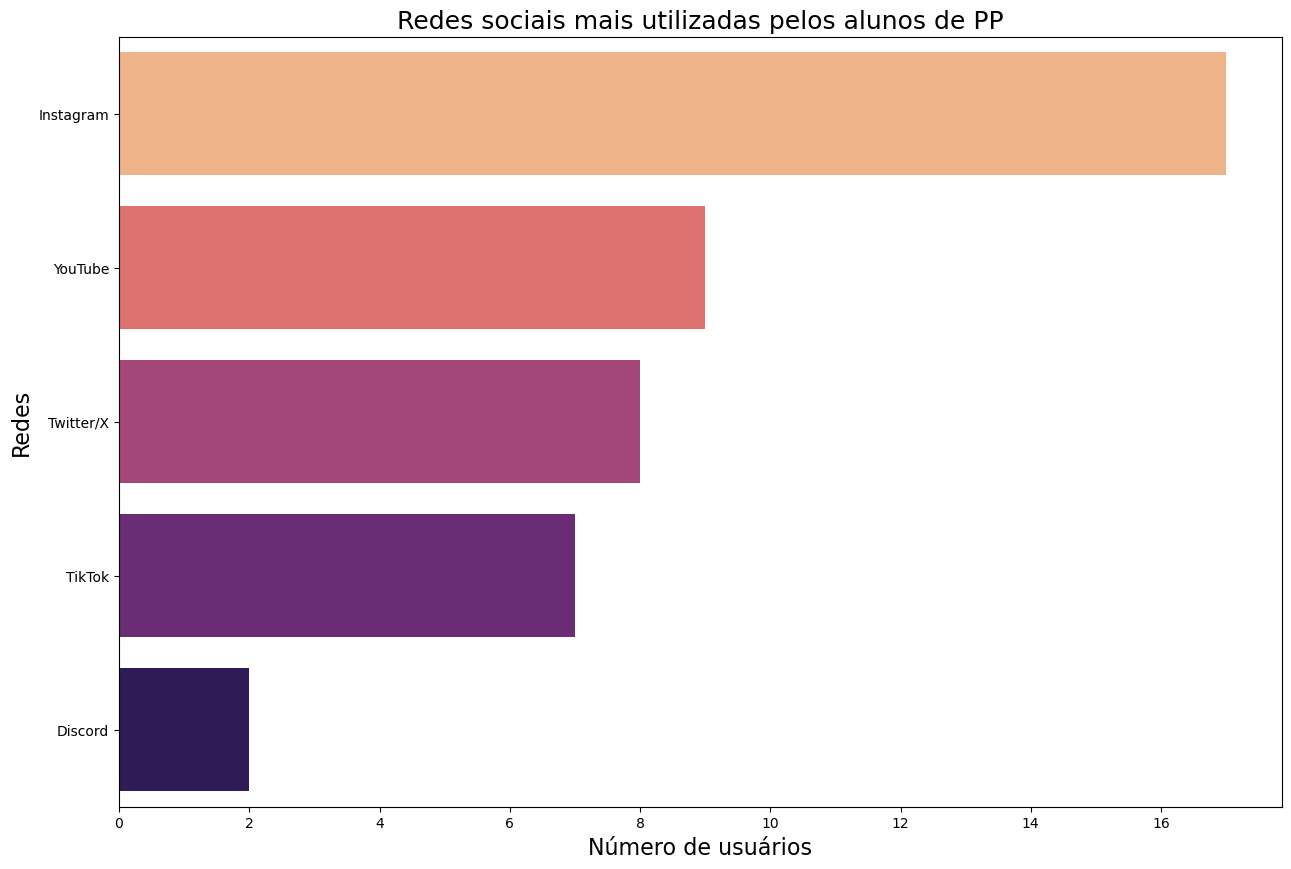

In [58]:
plt.figure(figsize=(15,10))
ax10 = sns.barplot(data=pp_redes,x="usuários",y="rede",palette="magma_r")
ax10.axes.set_title("Redes sociais mais utilizadas pelos alunos de PP",
                    fontsize=18)
ax10.axes.set_xlabel("Número de usuários",fontsize=16)
ax10.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [59]:
pp_colab_count = pp["n_colaboradores"].value_counts()
pp_colab_count

De 1 a 3     8
5 ou mais    5
De 3 a 5     4
Nenhum       1
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e598a400>,
 [Text(0.19101298416420226, 1.083288530300532, 'De 1 a 3'),
  Text(-0.95262790983307, -0.5500000594609754, '5 ou mais'),
  Text(0.5500001040567056, -0.9526278840857081, 'De 3 a 5'),
  Text(1.083288550419943, -0.19101287006131001, 'Nenhum')],
 [Text(0.10418890045320121, 0.5908846528911992, '44.44%'),
  Text(-0.5196152235453109, -0.3000000324332593, '27.78%'),
  Text(0.30000005675820307, -0.5196152095012952, '22.22%'),
  Text(0.5908846638654234, -0.10418883821526, '5.56%')])

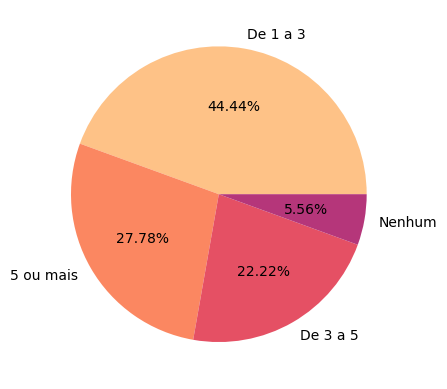

In [60]:
plt.pie(pp_colab_count, labels=pp_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [61]:
pp.describe()

,idade,avaliação
count,18.000000,18.000000
mean,20.833333,4.944444
std,1.790498,0.235702
min,18.000000,4.000000
25%,19.250000,5.000000
50%,21.000000,5.000000
75%,21.750000,5.000000
max,24.000000,5.000000


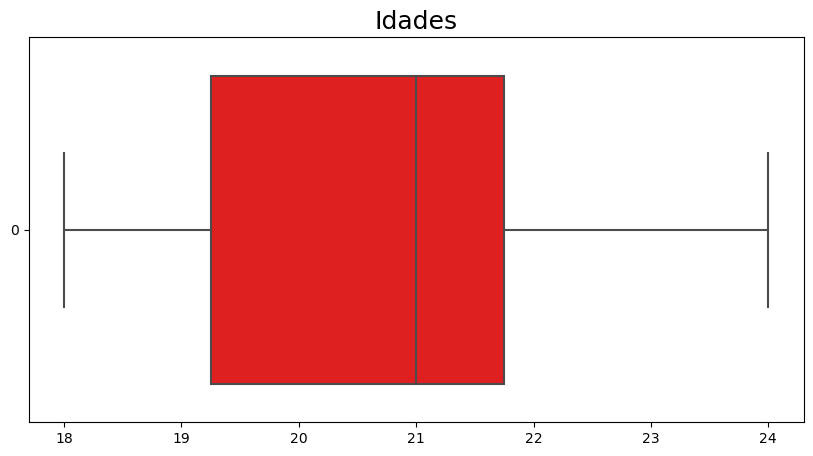

In [62]:
plt.figure(figsize=(10,5))
ax11 = sns.boxplot(data=pp["idade"],orient="h",color="red")
ax11.axes.set_title("Idades",fontsize=18)
plt.show()

In [63]:
pp_campos = campos_admirados(pp)
pp_campos = pp_campos.reset_index()
pp_campos = pp_campos.drop(columns=["index"])
pp_campos

,campo,qtde
0,Limpeza,10
1,Segurança,6
2,Portaria,5
3,Lanchonete,3
4,Facilities,2
5,Marketing,2


In [64]:
pp_campos["%"] = [i/(len(pp))*100 for i in pp_campos["qtde"]]
pp_campos

,campo,qtde,%
0,Limpeza,10,55.555556
1,Segurança,6,33.333333
2,Portaria,5,27.777778
3,Lanchonete,3,16.666667
4,Facilities,2,11.111111
5,Marketing,2,11.111111


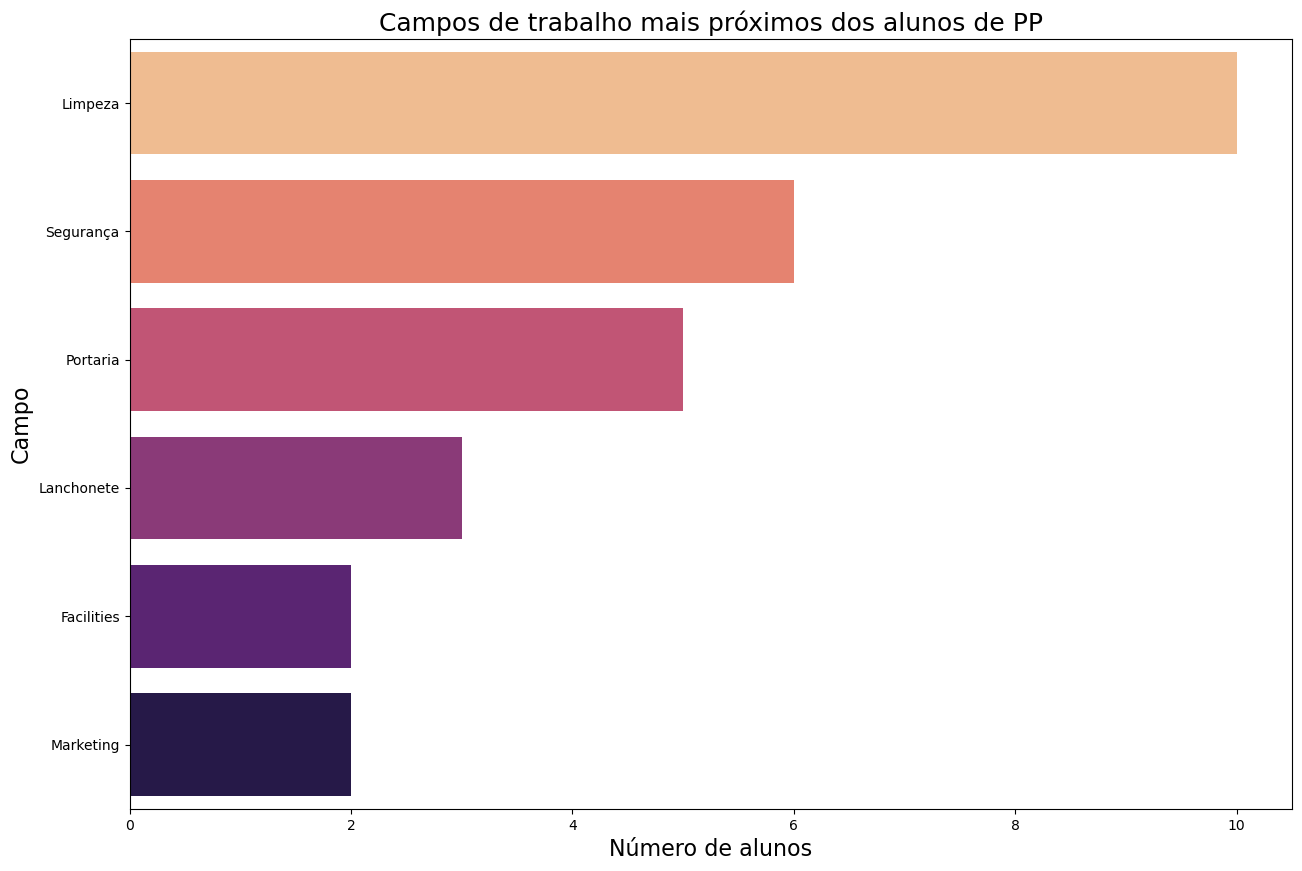

In [65]:
plt.figure(figsize=(15,10))
ax12 = sns.barplot(data=pp_campos,x="qtde",y="campo",palette="magma_r")
ax12.axes.set_title("Campos de trabalho mais próximos dos alunos de PP",
                    fontsize=18)
ax12.axes.set_xlabel("Número de alunos",fontsize=16)
ax12.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Ciência da Computação

In [66]:
cc = data[data["curso"] == "Ciência da Computação"]

cc = cc.reset_index()
cc = cc.drop(columns=["index"])
cc

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,20,Ciência da Computação,[Instagram],Nenhum,Sim,-,5,[Limpeza]
1,18,Ciência da Computação,"[Twitter/X, Instagram, TikTok, Discord, YouTube]",Nenhum,Não,.,5,[Limpeza]
2,22,Ciência da Computação,"[Twitter/X, Instagram, TikTok, YouTube]",Nenhum,Sim,.,5,[Segurança]
3,19,Ciência da Computação,"[TikTok, Discord, YouTube]",De 1 a 3,"Já, com o coordenador do meu curso",A tia do café que sempre interagi com a gente,5,[Limpeza]
4,23,Ciência da Computação,"[Instagram, TikTok, Discord, YouTube]",De 1 a 3,Sim,Abertura das salas pra monitoria,5,[Portaria]
5,22,Ciência da Computação,"[Instagram, YouTube]",De 3 a 5,Má vontade por parte dos colaboradores,Apoio e ajuda,4,"[Limpeza, Portaria, Segurança, Facilities, Mar..."
6,20,Ciência da Computação,[YouTube],De 3 a 5,Sim,Boas,4,[Portaria]
7,25,Ciência da Computação,"[Twitter/X, Facebook, Instagram, YouTube]",De 1 a 3,Sim.,"Com a tia da limpeza, que ficou preocupada qua...",4,[Limpeza]
8,19,Ciência da Computação,[naouso],5 ou mais,"Sim, gosto de conversar com outros","Com o pedrao da portaria, gente fina",5,[Portaria]
9,19,Ciência da Computação,"[Instagram, TikTok]",De 1 a 3,Sim,Conversas,5,[Limpeza]


In [67]:
cc_redes = socials(cc)
cc_redes

,rede,usuários
0,Instagram,19
1,YouTube,17
2,Discord,11
3,TikTok,8
4,Twitter/X,5
5,Facebook,1


In [68]:
cc_redes["%"] = [i/(len(cc))*100 for i in cc_redes["usuários"]]
cc_redes

,rede,usuários,%
0,Instagram,19,82.608696
1,YouTube,17,73.913043
2,Discord,11,47.826087
3,TikTok,8,34.782609
4,Twitter/X,5,21.739130
5,Facebook,1,4.347826


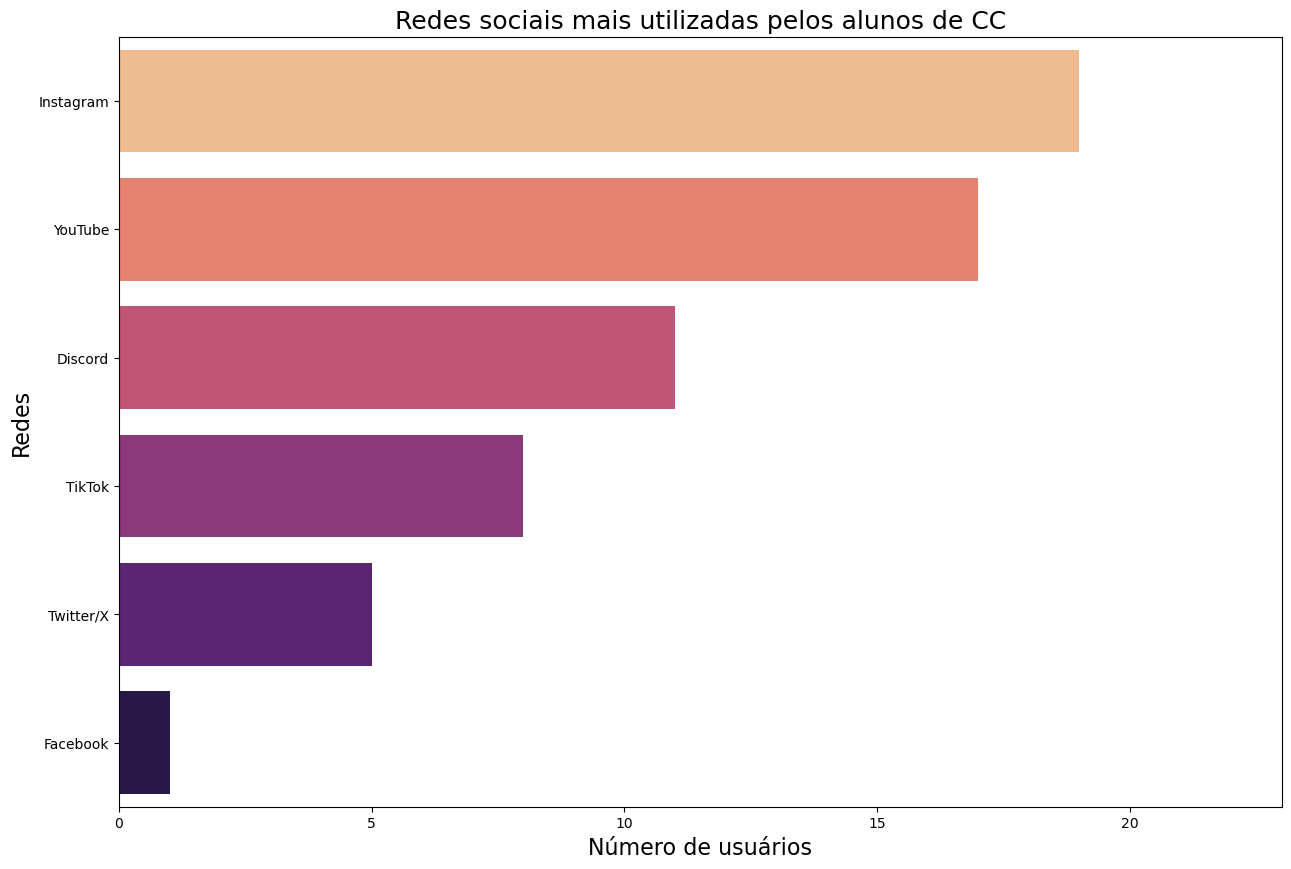

In [69]:
plt.figure(figsize=(15,10))
ax13 = sns.barplot(data=cc_redes,x="usuários",y="rede",palette="magma_r")
ax13.axes.set_title("Redes sociais mais utilizadas pelos alunos de CC",
                    fontsize=18)
ax13.axes.set_xlabel("Número de usuários",fontsize=16)
ax13.axes.set_ylabel("Redes",fontsize=16)
ax13.set_xlim(left=0,right=23)
plt.show()

In [70]:
cc_colab_count = cc["n_colaboradores"].value_counts()
cc_colab_count

De 1 a 3     13
5 ou mais     5
Nenhum        3
De 3 a 5      2
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e6177400>,
 [Text(-0.22380156174816726, 1.0769925073829816, 'De 1 a 3'),
  Text(-0.5060716587895875, -0.9766736794702495, '5 ou mais'),
  Text(0.6343482226301046, -0.8986669752728357, 'Nenhum'),
  Text(1.0592089728931229, -0.29677660241787235, 'De 3 a 5')],
 [Text(-0.12207357913536394, 0.5874504585725353, '56.52%'),
  Text(-0.2760390866125022, -0.5327310978928633, '21.74%'),
  Text(0.34600812143460247, -0.49018198651245576, '13.04%'),
  Text(0.5777503488507942, -0.16187814677338488, '8.70%')])

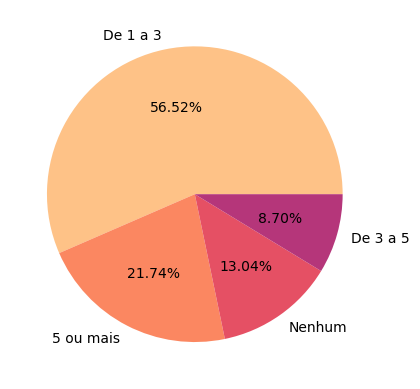

In [71]:
plt.pie(cc_colab_count, labels=cc_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [72]:
cc.describe()

,idade,avaliação
count,23.000000,23.000000
mean,20.739130,4.869565
std,2.562268,0.344350
min,18.000000,4.000000
25%,19.000000,5.000000
50%,20.000000,5.000000
75%,22.500000,5.000000
max,26.000000,5.000000


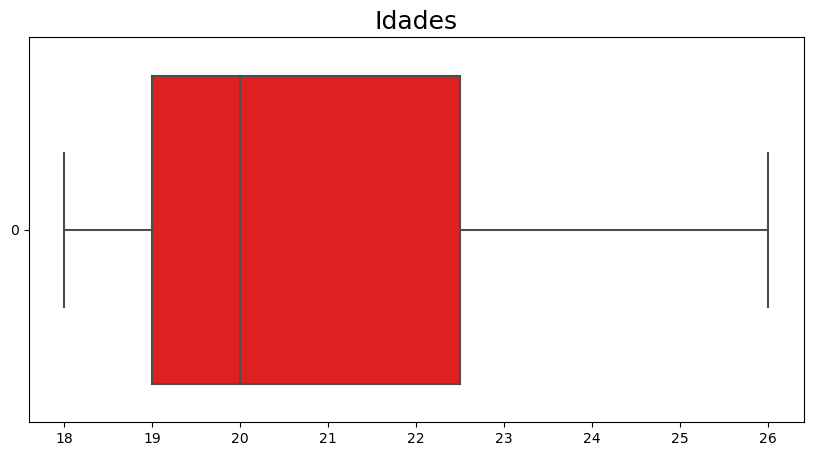

In [73]:
plt.figure(figsize=(10,5))
ax14 = sns.boxplot(data=cc["idade"],orient="h",color="red")
ax14.axes.set_title("Idades",fontsize=18)
plt.show()

In [74]:
cc_campos = campos_admirados(cc)
cc_campos = cc_campos.reset_index()
cc_campos = cc_campos.drop(columns=["index"])
cc_campos

,campo,qtde
0,Limpeza,9
1,Portaria,7
2,Segurança,6
3,Facilities,4
4,Lanchonete,1
5,Marketing,1


In [75]:
cc_campos["%"] = [i/(len(cc))*100 for i in cc_campos["qtde"]]
cc_campos

,campo,qtde,%
0,Limpeza,9,39.130435
1,Portaria,7,30.434783
2,Segurança,6,26.086957
3,Facilities,4,17.391304
4,Lanchonete,1,4.347826
5,Marketing,1,4.347826


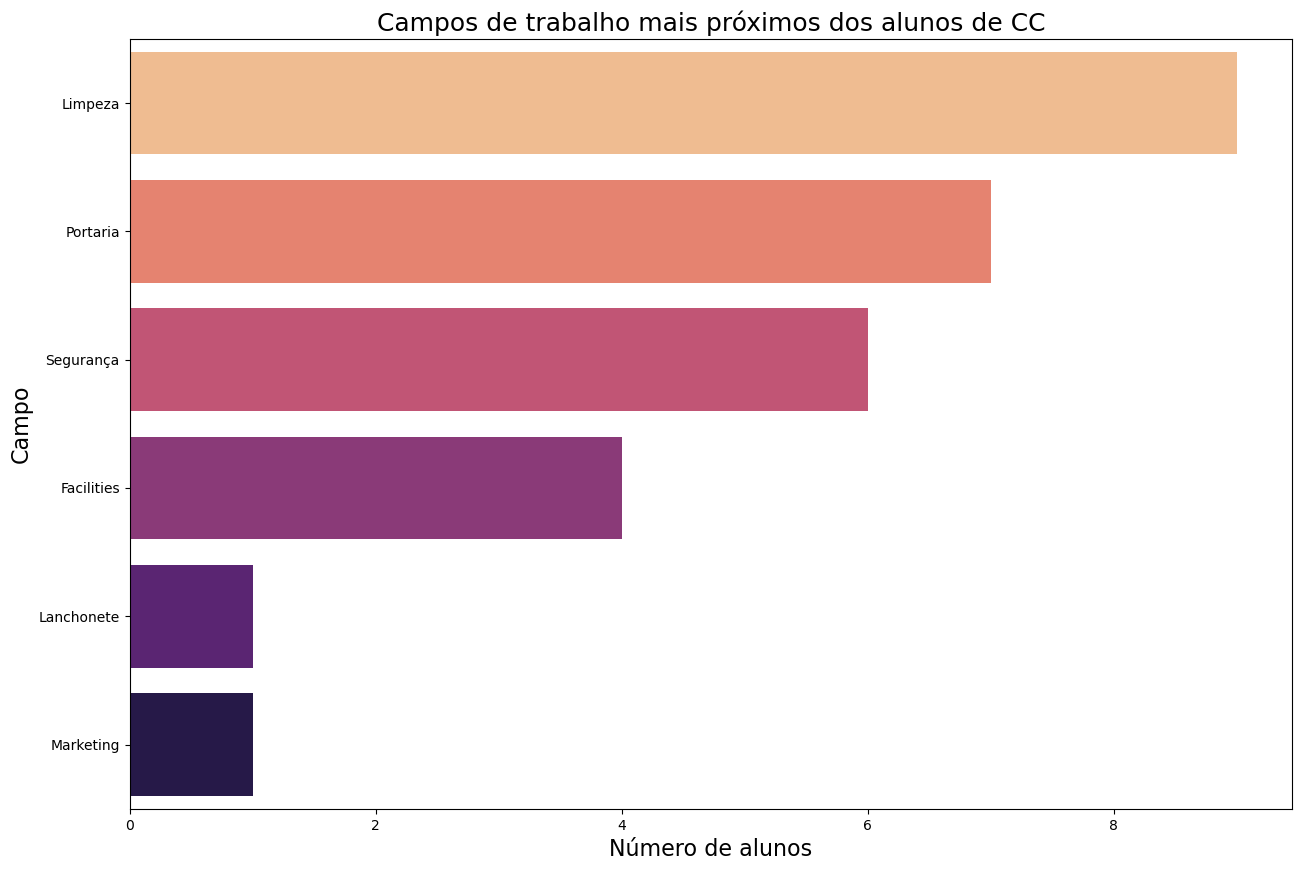

In [76]:
plt.figure(figsize=(15,10))
ax15 = sns.barplot(data=cc_campos,x="qtde",y="campo",palette="magma_r")
ax15.axes.set_title("Campos de trabalho mais próximos dos alunos de CC",
                    fontsize=18)
ax15.axes.set_xlabel("Número de alunos",fontsize=16)
ax15.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Engenharia de Software

In [77]:
es = data[data["curso"] == "Engenharia de Software"]

es = es.reset_index()
es = es.drop(columns=["index"])
es

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,18,Engenharia de Software,"[Instagram, TikTok]",5 ou mais,Sim. Por conta do SPRINT IDP,A maioria é comentários sobre futebol,5,[Facilities]
1,21,Engenharia de Software,"[Instagram, TikTok]",De 1 a 3,Sim,Ajuda e prestatividade,5,[Segurança]
2,20,Engenharia de Software,"[Twitter/X, Instagram, Discord]",Nenhum,Sim,apenas da realização do meu pedido,5,[Facilities]
3,19,Engenharia de Software,"[Instagram, YouTube]",De 1 a 3,sim,Com o Davi no idp go,5,[Coordenadoresdecurso]
4,19,Engenharia de Software,"[Twitter/X, Instagram]",De 1 a 3,Sim,"conversar no banheiro, receber bom dia quando ...",5,[Limpeza]
5,20,Engenharia de Software,"[Instagram, YouTube]",Nenhum,Sim,Conversar no café,5,"[Limpeza, Portaria, Segurança, Facilities]"
6,18,Engenharia de Software,"[Instagram, YouTube]",De 3 a 5,"Sim, porque eu gosto deles",Conversas motivacionais,5,[Limpeza]
7,22,Engenharia de Software,[Instagram],5 ou mais,Sim,"Cultos no IDP, conversas antes da aula, intera...",5,[Segurança]
8,19,Engenharia de Software,"[Twitter/X, Instagram, TikTok, Discord, YouTube]",De 1 a 3,Sim,Eles sendo muito gente boas e educados,5,[Portaria]
9,19,Engenharia de Software,"[Twitter/X, Instagram, Discord, YouTube]",De 1 a 3,Já sim,Memórias apenas de conversar casuais,5,[Facilities]


In [78]:
es_redes = socials(es)
es_redes

,rede,usuários
0,Instagram,16
1,YouTube,8
2,TikTok,7
3,Discord,5
4,Twitter/X,5


In [79]:
es_redes["%"] = [i/(len(es))*100 for i in es_redes["usuários"]]
es_redes

,rede,usuários,%
0,Instagram,16,88.888889
1,YouTube,8,44.444444
2,TikTok,7,38.888889
3,Discord,5,27.777778
4,Twitter/X,5,27.777778


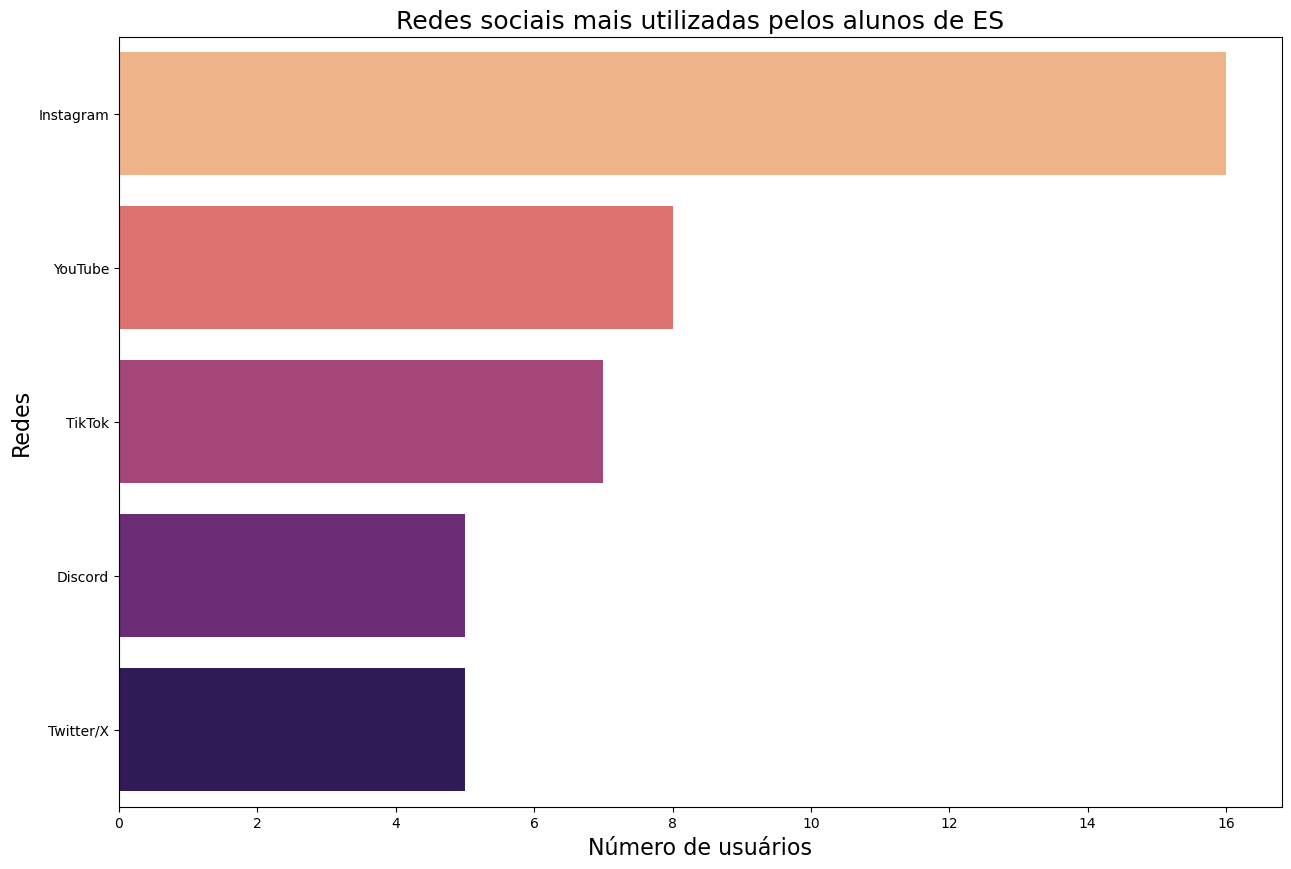

In [80]:
plt.figure(figsize=(15,10))
ax16 = sns.barplot(data=es_redes,x="usuários",y="rede",palette="magma_r")
ax16.axes.set_title("Redes sociais mais utilizadas pelos alunos de ES",
                    fontsize=18)
ax16.axes.set_xlabel("Número de usuários",fontsize=16)
ax16.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [81]:
es_colab_count = es["n_colaboradores"].value_counts()
es_colab_count

De 1 a 3     8
Nenhum       6
5 ou mais    3
De 3 a 5     1
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e64e9670>,
 [Text(0.19101298416420226, 1.083288530300532, 'De 1 a 3'),
  Text(-0.8426488506529132, -0.7070664144854603, 'Nenhum'),
  Text(0.7070664539326991, -0.8426488175527445, '5 ou mais'),
  Text(1.083288550419943, -0.19101287006131001, 'De 3 a 5')],
 [Text(0.10418890045320121, 0.5908846528911992, '44.44%'),
  Text(-0.4596266458106798, -0.38567258971934193, '33.33%'),
  Text(0.38567261123601765, -0.45962662775604235, '16.67%'),
  Text(0.5908846638654234, -0.10418883821526, '5.56%')])

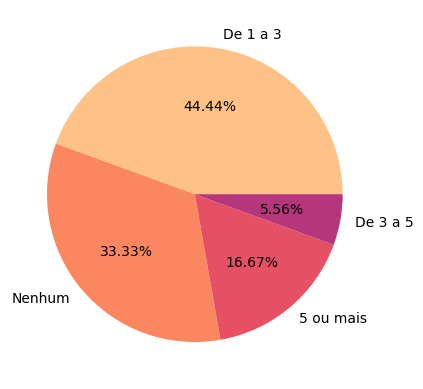

In [82]:
plt.pie(es_colab_count, labels=es_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [83]:
es.describe()

,idade,avaliação
count,18.000000,18.000000
mean,19.388889,4.944444
std,1.377931,0.235702
min,17.000000,4.000000
25%,18.250000,5.000000
50%,19.000000,5.000000
75%,20.750000,5.000000
max,22.000000,5.000000


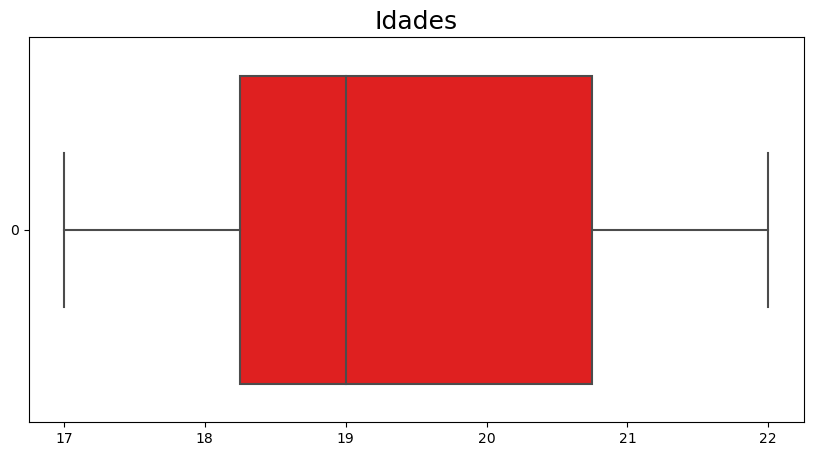

In [84]:
plt.figure(figsize=(10,5))
ax17 = sns.boxplot(data=es["idade"],orient="h",color="red")
ax17.axes.set_title("Idades",fontsize=18)
plt.show()

In [85]:
es_campos = campos_admirados(es)
es_campos = es_campos.reset_index()
es_campos = es_campos.drop(columns=["index"])
es_campos

,campo,qtde
0,Portaria,6
1,Facilities,5
2,Limpeza,5
3,Segurança,3
4,Marketing,1


In [86]:
es_campos["%"] = [i/(len(es))*100 for i in es_campos["qtde"]]
es_campos

,campo,qtde,%
0,Portaria,6,33.333333
1,Facilities,5,27.777778
2,Limpeza,5,27.777778
3,Segurança,3,16.666667
4,Marketing,1,5.555556


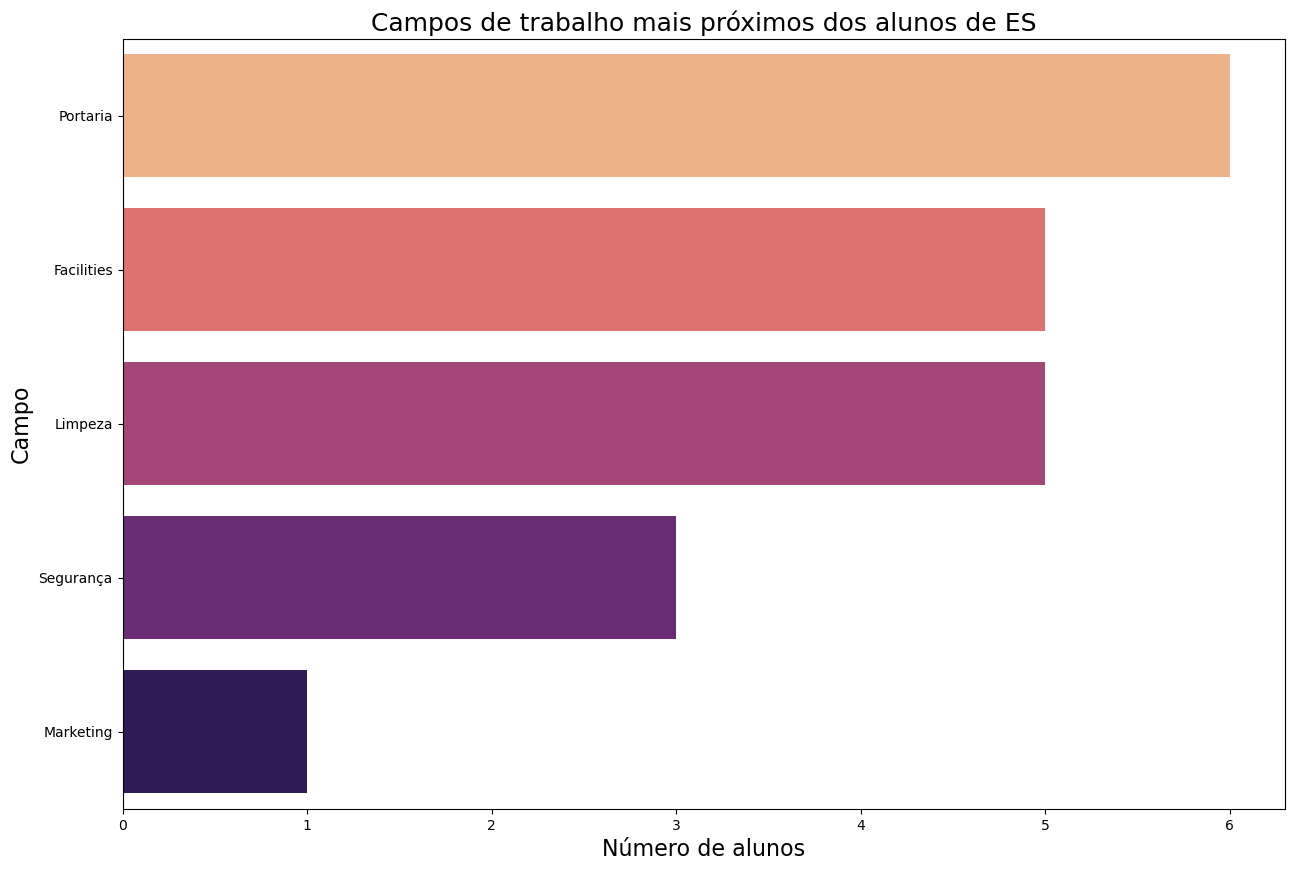

In [87]:
plt.figure(figsize=(15,10))
ax18 = sns.barplot(data=es_campos,x="qtde",y="campo",palette="magma_r")
ax18.axes.set_title("Campos de trabalho mais próximos dos alunos de ES",
                    fontsize=18)
ax18.axes.set_xlabel("Número de alunos",fontsize=16)
ax18.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Administração

In [88]:
adm = data[data["curso"] == "Administração"]

adm = adm.reset_index()
adm = adm.drop(columns=["index"])
adm

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,20,Administração,[TikTok],De 1 a 3,Ja,Nenhuma,5,[Segurança]
1,22,Administração,"[Twitter/X, Instagram, TikTok]",De 1 a 3,Sim,Sobre o dia a dia,5,[Limpeza]
2,25,Administração,"[Twitter/X, Instagram, TikTok]",De 3 a 5,Sim,Nenhuma,5,[Portaria]
3,24,Administração,"[Instagram, YouTube]",5 ou mais,Sim,Conversas,5,"[Portaria, Limpeza, Facilities]"
4,22,Administração,[Instagram],De 1 a 3,"Já, sempre bom dia","Bom tratamento, principalmente pela equipe de ...",5,[Limpeza]
5,19,Administração,"[Instagram, YouTube]",De 1 a 3,"Sim, Por ver muitas vezes no dia a dia",Conversas,5,[Portaria]
6,19,Administração,"[Instagram, TikTok, YouTube]",De 1 a 3,Sim,gentileza e muito suporte,3,[Limpeza]
7,20,Administração,"[Instagram, YouTube]",De 1 a 3,Sim,Boas conversas,3,[Limpeza]
8,18,Administração,"[Instagram, TikTok]",De 1 a 3,NaN,Não,5,[nan]
9,20,Administração,"[Instagram, TikTok]",Nenhum,Não. Infelizmente n tive oportunidade,Infelizmente n tive contato,4,[nan]


In [89]:
adm_redes = socials(adm)
adm_redes

,rede,usuários
0,Instagram,16
1,TikTok,10
2,YouTube,9
3,Twitter/X,4


In [90]:
adm_redes["%"] = [i/(len(adm))*100 for i in adm_redes["usuários"]]
adm_redes

,rede,usuários,%
0,Instagram,16,94.117647
1,TikTok,10,58.823529
2,YouTube,9,52.941176
3,Twitter/X,4,23.529412


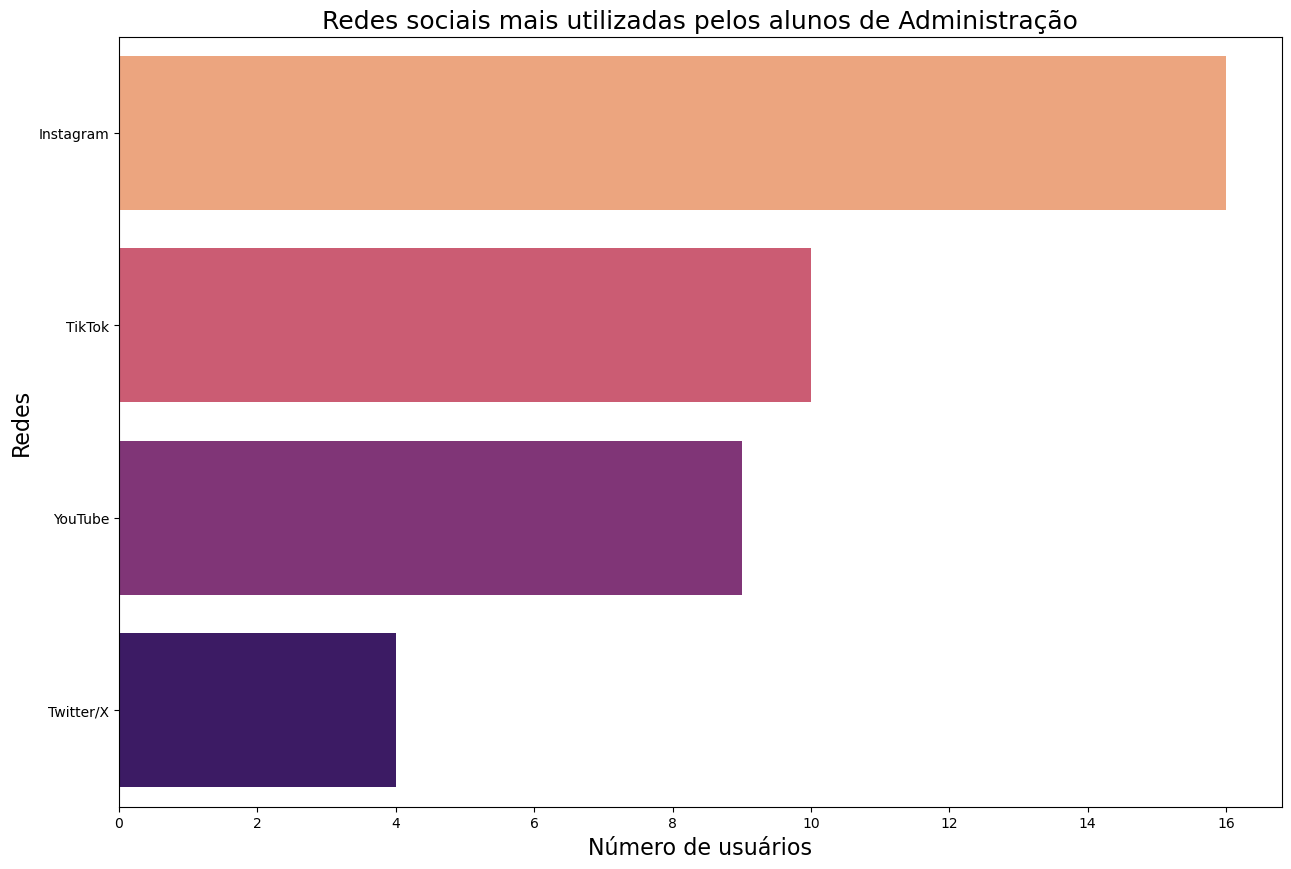

In [91]:
plt.figure(figsize=(15,10))
ax19 = sns.barplot(data=adm_redes,x="usuários",y="rede",palette="magma_r")
ax19.axes.set_title("Redes sociais mais utilizadas pelos alunos de Administração",
                    fontsize=18)
ax19.axes.set_xlabel("Número de usuários",fontsize=16)
ax19.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [92]:
adm_colab_count = adm["n_colaboradores"].value_counts()
adm_colab_count

De 1 a 3     9
Nenhum       4
De 3 a 5     2
5 ou mais    2
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e6f8b580>,
 [Text(-0.10149529192737097, 1.095307584980848, 'De 1 a 3'),
  Text(-0.6628979428943129, -0.8778190686619244, 'Nenhum'),
  Text(0.4903123716715928, -0.9846795307031511, 'De 3 a 5'),
  Text(1.0257195262058036, -0.39736564214856573, '5 ou mais')],
 [Text(-0.055361068324020525, 0.5974405008986443, '52.94%'),
  Text(-0.36158069612417065, -0.47881040108832235, '23.53%'),
  Text(0.2674431118208688, -0.5370979258380824, '11.76%'),
  Text(0.5594833779304382, -0.2167448957173995, '11.76%')])

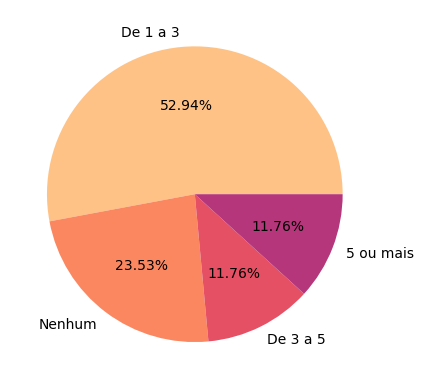

In [93]:
plt.pie(adm_colab_count, labels=adm_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [94]:
adm.describe()

,idade,avaliação
count,17.000000,17.000000
mean,21.176471,4.705882
std,2.674773,0.685994
min,18.000000,3.000000
25%,19.000000,5.000000
50%,20.000000,5.000000
75%,22.000000,5.000000
max,28.000000,5.000000


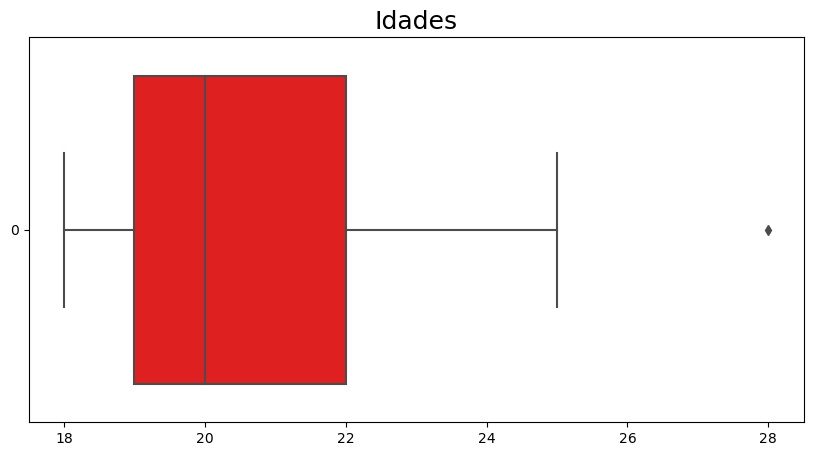

In [95]:
plt.figure(figsize=(10,5))
ax20 = sns.boxplot(data=adm["idade"],orient="h",color="red")
ax20.axes.set_title("Idades",fontsize=18)
plt.show()

In [96]:
adm_campos = campos_admirados(adm)
adm_campos = adm_campos.reset_index()
adm_campos = adm_campos.drop(columns=["index"])
adm_campos

,campo,qtde
0,Limpeza,9
1,Portaria,8
2,Segurança,4
3,Facilities,1
4,Lanchonete,1


In [97]:
adm_campos["%"] = [i/(len(adm))*100 for i in adm_campos["qtde"]]
adm_campos

,campo,qtde,%
0,Limpeza,9,52.941176
1,Portaria,8,47.058824
2,Segurança,4,23.529412
3,Facilities,1,5.882353
4,Lanchonete,1,5.882353


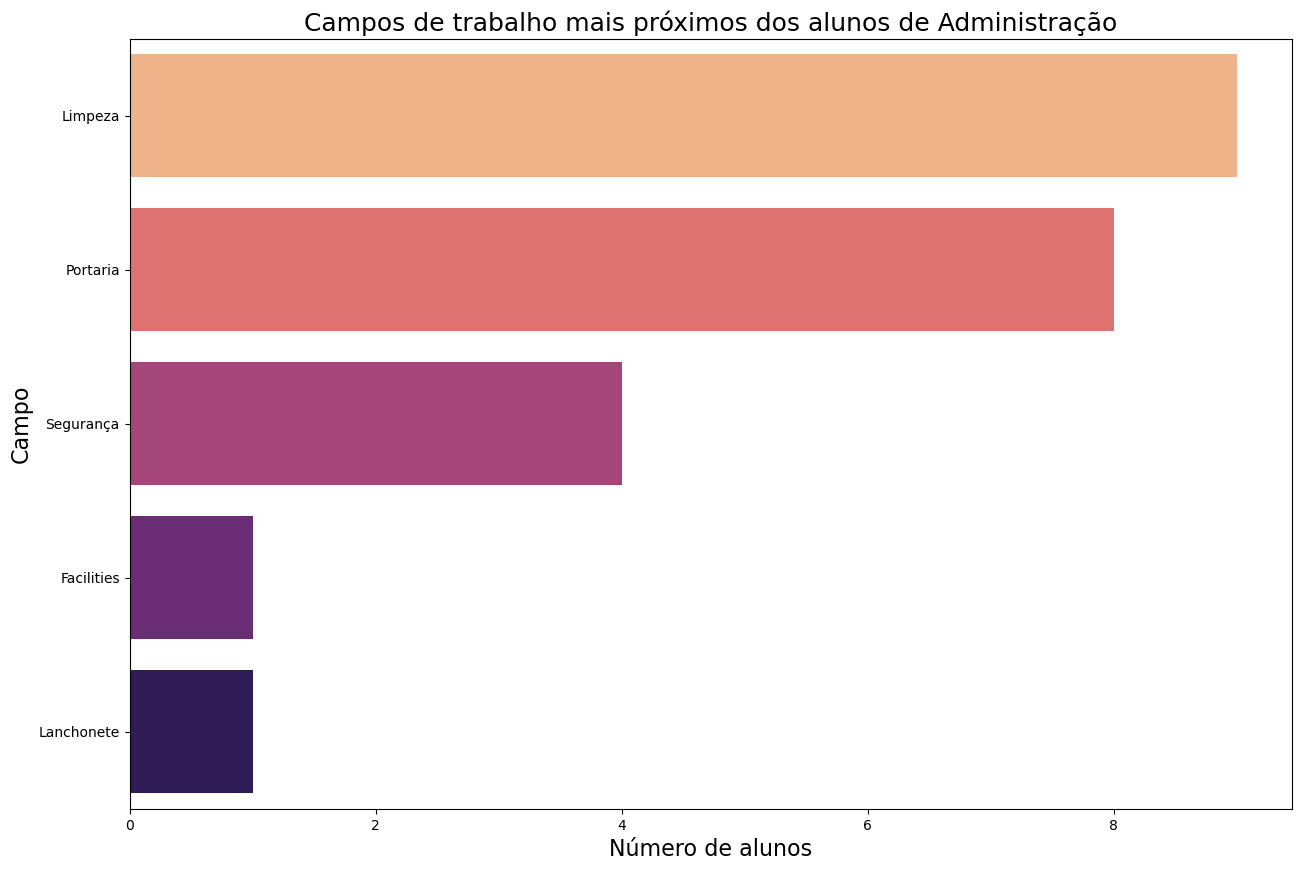

In [98]:
plt.figure(figsize=(15,10))
ax21 = sns.barplot(data=adm_campos,x="qtde",y="campo",palette="magma_r")
ax21.axes.set_title("Campos de trabalho mais próximos dos alunos de Administração",
                    fontsize=18)
ax21.axes.set_xlabel("Número de alunos",fontsize=16)
ax21.axes.set_ylabel("Campo",fontsize=16)
plt.show()

### Jornalismo

In [99]:
jor = data[data["curso"] == "Jornalismo"]

jor = jor.reset_index()
jor = jor.drop(columns=["index"])
jor

,idade,curso,redes_sociais,n_colaboradores,interações,memórias,avaliação,campos
0,33,Jornalismo,"[Instagram, TikTok]",De 1 a 3,Sim,Melhores conversas,4,[Limpeza]
1,21,Jornalismo,"[Twitter/X, Facebook, Instagram, YouTube]",De 1 a 3,"Sim, dando bom dia e quando preciso de algo.",Nenhuma,5,"[Limpeza, Portaria, Segurança, Facilities, Lan..."
2,25,Jornalismo,"[Instagram, YouTube]",De 1 a 3,Sim,São sempre muito gentis e prestativos.,5,"[Limpeza, Portaria, Facilities]"


In [100]:
jor_redes = socials(jor)
jor_redes

,rede,usuários
0,Instagram,3
1,YouTube,2
2,Facebook,1
3,TikTok,1
4,Twitter/X,1


In [101]:
jor_redes["%"] = [i/(len(jor))*100 for i in jor_redes["usuários"]]
jor_redes

,rede,usuários,%
0,Instagram,3,100.000000
1,YouTube,2,66.666667
2,Facebook,1,33.333333
3,TikTok,1,33.333333
4,Twitter/X,1,33.333333


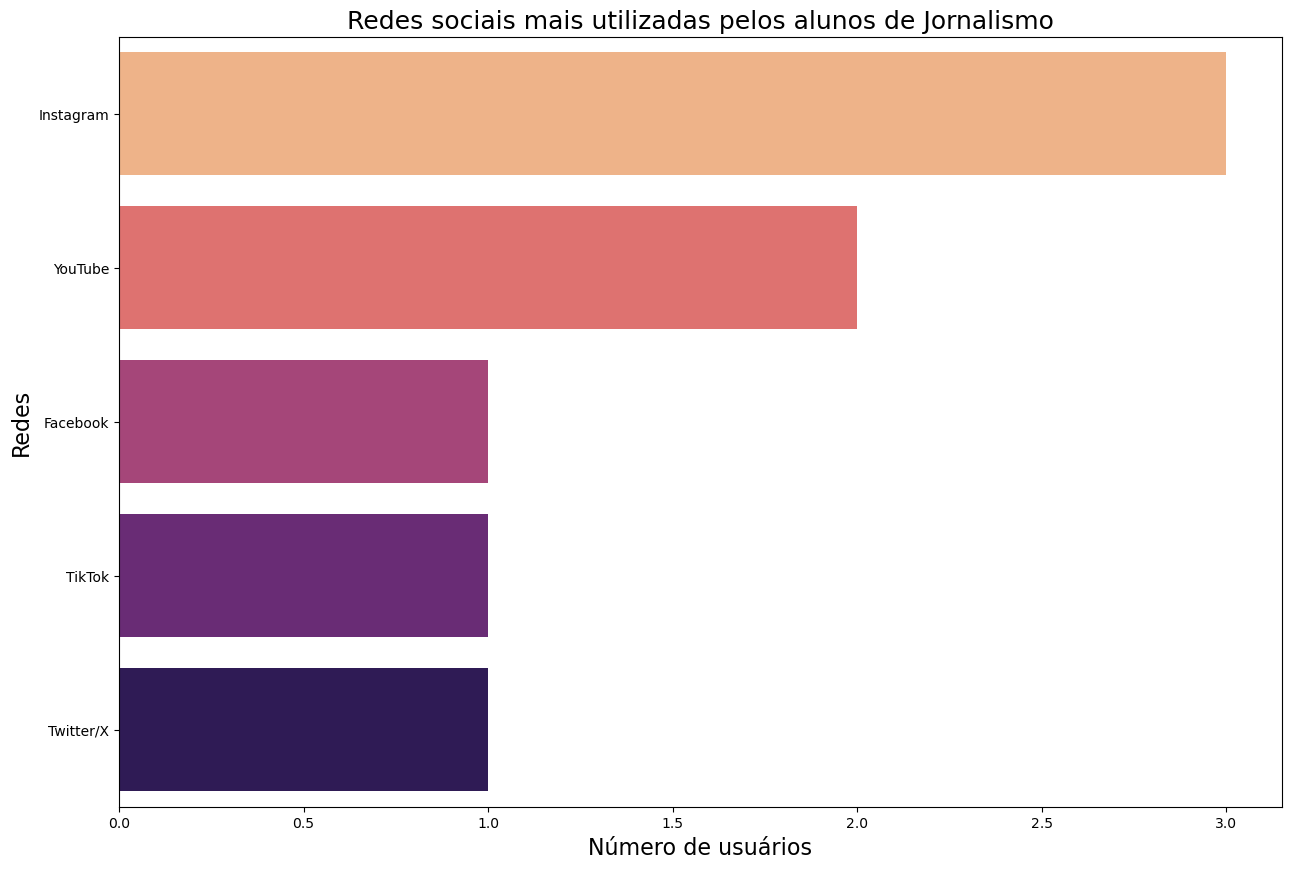

In [102]:
plt.figure(figsize=(15,10))
ax22 = sns.barplot(data=jor_redes,x="usuários",y="rede",palette="magma_r")
ax22.axes.set_title("Redes sociais mais utilizadas pelos alunos de Jornalismo",
                    fontsize=18)
ax22.axes.set_xlabel("Número de usuários",fontsize=16)
ax22.axes.set_ylabel("Redes",fontsize=16)
plt.show()

In [103]:
jor_colab_count = jor["n_colaboradores"].value_counts()
jor_colab_count

De 1 a 3    3
Name: n_colaboradores, dtype: int64

([<matplotlib.patches.Wedge at 0x132e85b4f70>],
 [Text(-1.1, 1.3471114790620887e-16, 'De 1 a 3')],
 [Text(-0.6, 7.347880794884119e-17, '100.00%')])

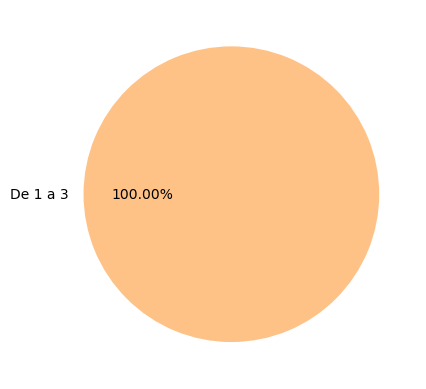

In [104]:
plt.pie(jor_colab_count, labels=jor_colab_count.index, colors=colors,
        autopct="%1.2f%%")

In [105]:
jor.describe()

,idade,avaliação
count,3.000000,3.000000
mean,26.333333,4.666667
std,6.110101,0.577350
min,21.000000,4.000000
25%,23.000000,4.500000
50%,25.000000,5.000000
75%,29.000000,5.000000
max,33.000000,5.000000


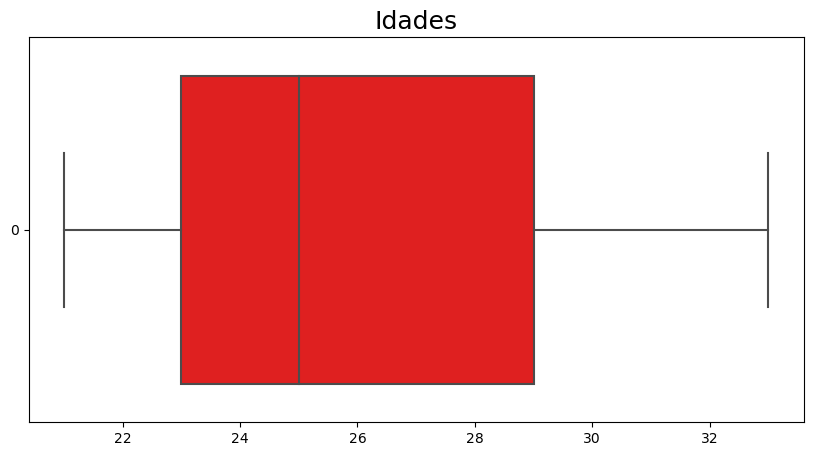

In [106]:
plt.figure(figsize=(10,5))
ax23 = sns.boxplot(data=jor["idade"],orient="h",color="red")
ax23.axes.set_title("Idades",fontsize=18)
plt.show()

In [107]:
jor_campos = campos_admirados(jor)
jor_campos = jor_campos.reset_index()
jor_campos = jor_campos.drop(columns=["index"])
jor_campos

,campo,qtde
0,Limpeza,3
1,Facilities,2
2,Portaria,2
3,Lanchonete,1
4,Segurança,1


In [108]:
jor_campos["%"] = [i/(len(jor))*100 for i in jor_campos["qtde"]]
jor_campos

,campo,qtde,%
0,Limpeza,3,100.000000
1,Facilities,2,66.666667
2,Portaria,2,66.666667
3,Lanchonete,1,33.333333
4,Segurança,1,33.333333


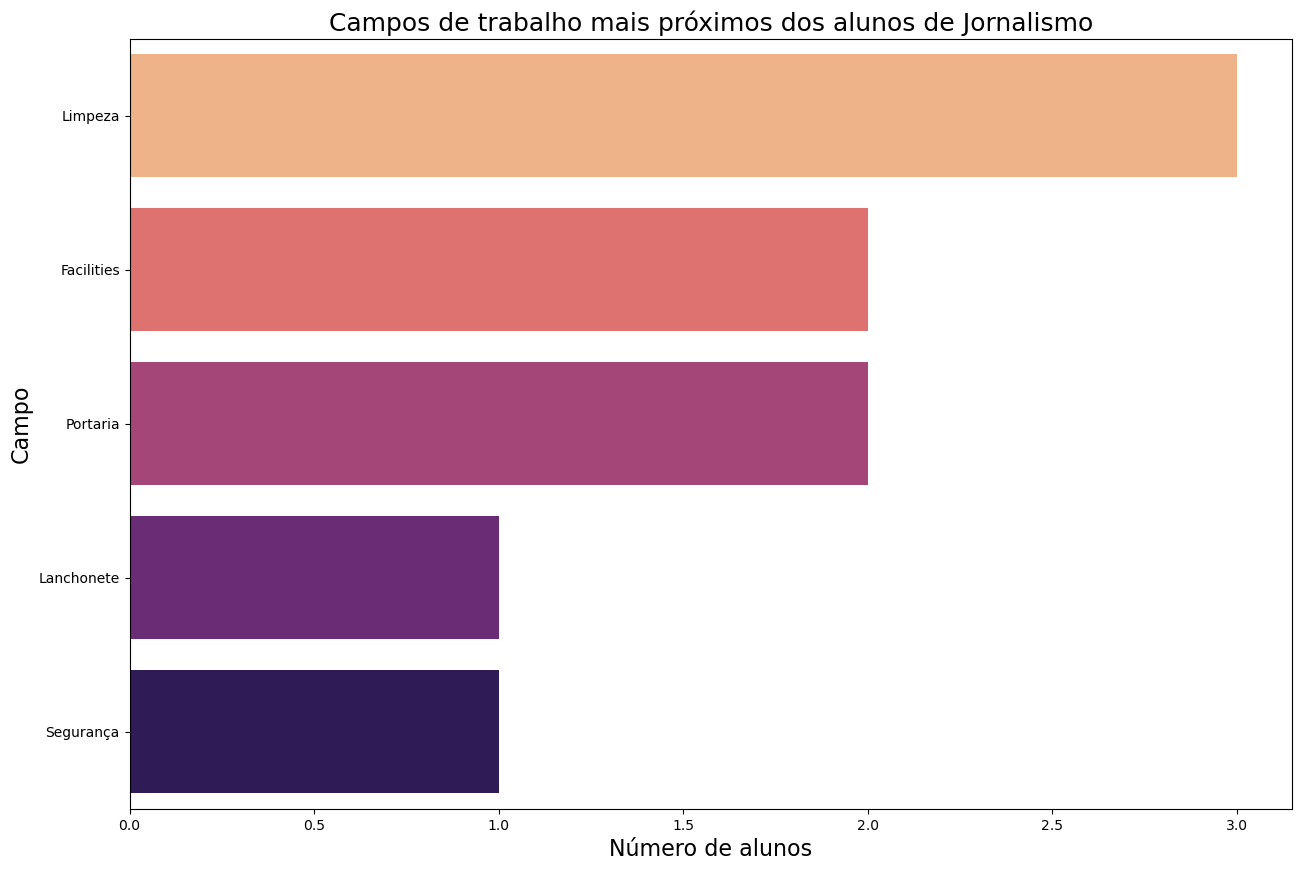

In [109]:
plt.figure(figsize=(15,10))
ax24 = sns.barplot(data=jor_campos,x="qtde",y="campo",palette="magma_r")
ax24.axes.set_title("Campos de trabalho mais próximos dos alunos de Jornalismo",
                    fontsize=18)
ax24.axes.set_xlabel("Número de alunos",fontsize=16)
ax24.axes.set_ylabel("Campo",fontsize=16)
plt.show()